# Import Data

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from datetime import datetime

from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split, KFold

%matplotlib inline

import time

np.random.seed(0)

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
file_name = "/content/drive/MyDrive/G05 Miniproject/New Model-20250212T185614Z-001/New Model/Solar_radiation_regression_.csv"
data = pd.read_csv(f"{file_name}")

data.head(7)

Site  Latitude  Longitude                 Date  \
0  Sharurah - TVTC  17.47586   47.08618  01/05/2017 00:00:00   
1  Sharurah - TVTC  17.47586   47.08618  01/06/2017 00:00:00   
2  Sharurah - TVTC  17.47586   47.08618  01/09/2017 00:00:00   
3  Sharurah - TVTC  17.47586   47.08618  01/10/2017 00:00:00   
4  Sharurah - TVTC  17.47586   47.08618  01/11/2017 00:00:00   
5  Sharurah - TVTC  17.47586   47.08618  01/03/2018 00:00:00   
6  Sharurah - TVTC  17.47586   47.08618  01/04/2018 00:00:00   

   Air Temperature (C°)  Air Temperature Uncertainty (C°)  \
0                  34.5                               0.5   
1                  36.3                               0.5   
2                  33.9                               0.5   
3                  29.2                               0.5   
4                  24.8                               0.5   
5                  27.4                               0.5   
6                  31.4                               0.5   

   Wind Direction at 3m (°N)  Wind Direction at 3m Uncertainty (°N)  \
0                       50.0                                    3.7   
1                       38.0                                    4.0   
2                       49.0                                    4.0   
3                       42.0                                    4.0   
4                       54.0                                    4.0   
5                       63.0                                    4.0   
6                       49.0                                    4.0   

   Wind Speed at 3m (m/s)  Wind Speed at 3m Uncertainty (m/s)  ...  \
0                     3.8                                 0.1  ...   
1                     3.3                                 0.1  ...   
2                     3.3                                 0.1  ...   
3                     3.3                                 0.1  ...   
4                     3.5                                 0.1  ...   
5                     3.9                                 0.1  ...   
6                     4.0                                 0.1  ...   

   Standard Deviation DNI (Wh/m2)  GHI Uncertainty (Wh/m2)  \
0                          1774.2                   1520.0   
1                          2088.1                   1527.0   
2                          1130.9                   1342.6   
3                           869.9                   1238.6   
4                           660.1                   1090.7   
5                          1355.7                   1439.6   
6                          1854.9                   1415.4   

   Standard Deviation GHI (Wh/m2)  Peak Wind Speed at 3m (m/s)  \
0                           472.4                         15.5   
1                           478.6                         17.6   
2                           336.5                         16.3   
3                           253.9                         13.6   
4                           257.0                         11.7   
5                           394.7                         17.1   
6                           423.5                         17.3   

   Peak Wind Speed at 3m Uncertainty (m/s)  Relative Humidity (%)  \
0                                      0.1                   19.9   
1                                      0.1                   10.1   
2                                      0.1                   14.3   
3                                      0.1                   17.7   
4                                      0.1                   28.9   
5                                      0.1                   18.0   
6                                      0.1                   24.4   

   Relative Humidity Uncertainty (%)  Barometric Pressure (mB (hPa equiv))  \
0                                3.0                                 926.6   
1                                3.0                                 923.4   
2                                3.0                                 

In [4]:
print(data.columns)


Index(['Site', 'Latitude', 'Longitude', 'Date', 'Air Temperature (C°)',
       'Air Temperature Uncertainty (C°)', 'Wind Direction at 3m (°N)',
       'Wind Direction at 3m Uncertainty (°N)', 'Wind Speed at 3m (m/s)',
       'Wind Speed at 3m Uncertainty (m/s)',
       'Wind Speed at 3m (std dev) (m/s)', 'DHI (Wh/m2)',
       'DHI Uncertainty (Wh/m2)', 'Standard Deviation DHI (Wh/m2)',
       'DNI (Wh/m2)', 'DNI Uncertainty (Wh/m2)',
       'Standard Deviation DNI (Wh/m2)', 'GHI Uncertainty (Wh/m2)',
       'Standard Deviation GHI (Wh/m2)', 'Peak Wind Speed at 3m (m/s)',
       'Peak Wind Speed at 3m Uncertainty (m/s)', 'Relative Humidity (%)',
       'Relative Humidity Uncertainty (%)',
       'Barometric Pressure (mB (hPa equiv))',
       'Barometric Pressure Uncertainty (mB (hPa equiv))', 'GHI (Wh/m2)'],
      dtype='object')


In [5]:
print(data[['GHI (Wh/m2)', 'DNI (Wh/m2)', 'DHI (Wh/m2)']].head())


   GHI (Wh/m2)  DNI (Wh/m2)  DHI (Wh/m2)
0       7400.9       5908.4       2866.0
1       7412.5       5124.4       3404.4
2       6528.3       6131.6       2007.4
3       6073.3       6975.2       1451.7
4       5262.7       7020.8       1092.0


In [6]:
print(data.columns.tolist())  # List all column names

['Site', 'Latitude', 'Longitude', 'Date', 'Air Temperature (C°)', 'Air Temperature Uncertainty (C°)', 'Wind Direction at 3m (°N)', 'Wind Direction at 3m Uncertainty (°N)', 'Wind Speed at 3m (m/s)', 'Wind Speed at 3m Uncertainty (m/s)', 'Wind Speed at 3m (std dev) (m/s)', 'DHI (Wh/m2)', 'DHI Uncertainty (Wh/m2)', 'Standard Deviation DHI (Wh/m2)', 'DNI (Wh/m2)', 'DNI Uncertainty (Wh/m2)', 'Standard Deviation DNI (Wh/m2)', 'GHI Uncertainty (Wh/m2)', 'Standard Deviation GHI (Wh/m2)', 'Peak Wind Speed at 3m (m/s)', 'Peak Wind Speed at 3m Uncertainty (m/s)', 'Relative Humidity (%)', 'Relative Humidity Uncertainty (%)', 'Barometric Pressure (mB (hPa equiv))', 'Barometric Pressure Uncertainty (mB (hPa equiv))', 'GHI (Wh/m2)']


In [7]:
data['Date'] = pd.to_datetime(data['Date'], format="%d/%m/%Y %H:%M:%S")
data['Hour'] = data['Date'].dt.hour          # 0-23
data['Day'] = data['Date'].dt.day            # 1-31
data['Month'] = data['Date'].dt.month        # 1-12
data['Year'] = data['Date'].dt.year          # e.g., 2023
data.drop(columns=['Date'], inplace=True)    # Drop original column

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn import metrics

def evaluate(y_test, predictions, txt, mdl_name, loc):
    # Ensure y_test and predictions are 1D
    y_test = y_test.ravel()
    predictions = predictions.ravel()

    # Create a DataFrame for plotting
    dd = pd.DataFrame({'Y_test': y_test, 'Predictions': predictions})

    ## Scatter plot
    plt.figure(figsize=(5/2.54, 5/2.54), dpi=300)
    sns.lmplot(data=dd, x="Y_test", y="Predictions", scatter_kws={"color": 'seagreen'},
               fit_reg=False, legend=False)

    # Adjust xlim and ylim to match GHI range
    min_val, max_val = min(y_test.min(), predictions.min()), max(y_test.max(), predictions.max())
    plt.xlim(min_val * 0.9, max_val * 1.1)
    plt.ylim(min_val * 0.9, max_val * 1.1)

    # Regression line
    g = sns.regplot(data=dd, x="Y_test", y="Predictions", label='Hi',
                    color=sns.color_palette('bright')[3],
                    scatter=False, truncate=True)

    g.set_xlim(min_val * 0.9, max_val * 1.1)
    g.set_ylim(min_val * 0.9, max_val * 1.1)

    # Set axis labels for GHI prediction
    g.set_xlabel('Measured GHI (Wh/m$^{2}$)', fontsize=14, fontfamily='sans-serif', weight='bold')
    g.set_ylabel('Estimated GHI (Wh/m$^{2}$)', fontsize=14, fontfamily='sans-serif', weight='bold')

    # Regression line calculation
    B1, B0 = np.polyfit(y_test, predictions, 1)

    # Add R² score to the plot
    plt.text(min_val * 1.05, max_val * 0.95, 'R$^2$=' + '{0:0.4f}'.format(metrics.r2_score(y_test, predictions)),
             horizontalalignment='left', fontfamily='sans-serif', size='x-large', color='black', weight='semibold')

    # Save plot
    plt.savefig(mdl_name + '_' + txt + '.pdf', dpi=300, bbox_inches='tight')
    plt.show()

    # Print evaluation metrics
    print('MAE:', metrics.mean_absolute_error(y_test, predictions))
    print('MSE:', metrics.mean_squared_error(y_test, predictions))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
    print('R^2:', metrics.r2_score(y_test, predictions))
    print('Pearson correlation:', pearsonr(y_test, predictions)[0])


# Feature plots

In [9]:
import matplotlib.pyplot as plt
import matplotlib

# Corrected font settings
font = {
    'family': 'DejaVu Sans',  # Matplotlib default, widely supported
    'weight': 'bold',
    'size': 8
}

# Apply font settings globally
matplotlib.rc('font', **font)




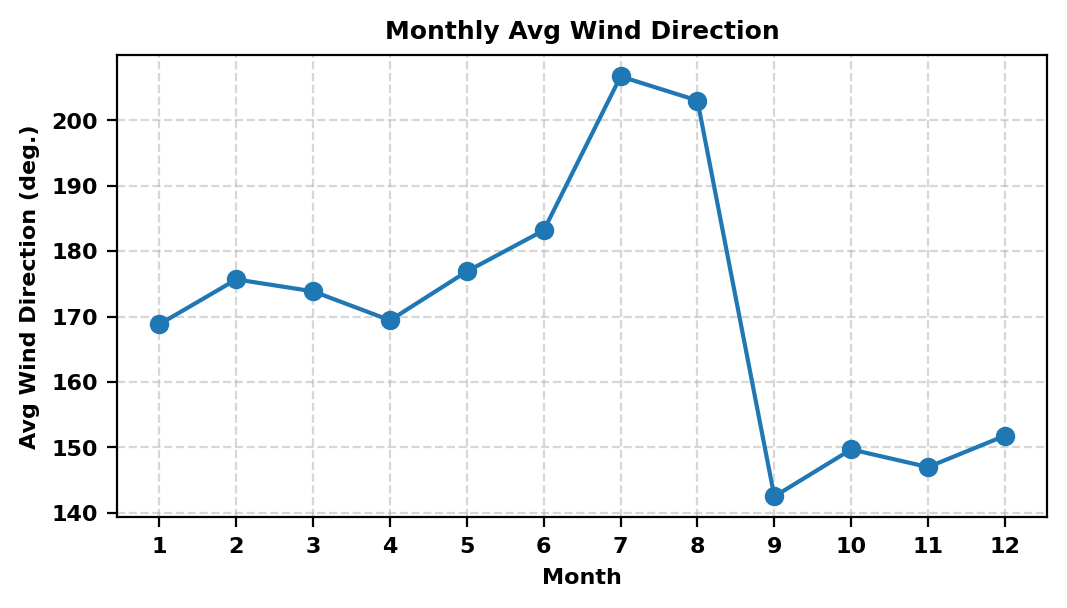

In [10]:
monthly_avg = data.groupby('Month')['Wind Direction at 3m (°N)'].mean()

plt.figure(figsize=(6, 3), dpi=200)
plt.plot(monthly_avg.index, monthly_avg.values, marker='o')
plt.xticks(ticks=range(1, 13))
plt.ylabel('Avg Wind Direction (deg.)', fontsize=8, fontweight='bold')
plt.xlabel('Month', fontsize=8, fontweight='bold')
plt.title('Monthly Avg Wind Direction', fontsize=9, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig('SR_month_vs_WDir_avg.pdf', bbox_inches='tight')
plt.show()


### Linear Regression

In [11]:

X = data.drop(columns=['GHI (Wh/m2)', 'Site', 'Latitude', 'Longitude','Hour', 'Day', 'Month', 'Year']).reset_index(drop=True)
y = data['GHI (Wh/m2)']


In [37]:
print(X.shape)  # Outputs (rows, columns)

(1649, 21)


In [38]:
from sklearn.model_selection import train_test_split

y = data['GHI (Wh/m2)']  # Define the target variable

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Save the test indices relative to original DataFrame
test_indices = y_test.index
X_train.head()


Air Temperature (C°)  Air Temperature Uncertainty (C°)  \
584                   23.7                               0.5   
63                    27.4                               0.5   
1182                  19.9                               0.5   
1640                  32.3                               0.5   
1466                  29.9                               0.5   

      Wind Direction at 3m (°N)  Wind Direction at 3m Uncertainty (°N)  \
584                       307.0                                    4.0   
63                         57.0                                    4.0   
1182                       90.0                                    3.7   
1640                      317.0                                    4.0   
1466                        0.0                                    0.0   

      Wind Speed at 3m (m/s)  Wind Speed at 3m Uncertainty (m/s)  \
584                      1.5                                 0.0   
63                       2.4                                 0.1   
1182                     1.8                                 0.0   
1640                     2.3                                 0.0   
1466                     0.0                                 0.0   

      Wind Speed at 3m (std dev) (m/s)  DHI (Wh/m2)  DHI Uncertainty (Wh/m2)  \
584                                0.9       1465.7                    120.1   
63                                 1.8       3325.2                    644.6   
1182                               1.0       1091.4                     89.0   
1640                               1.5       1707.8                    480.2   
1466                               0.0       1688.5                    123.3   

      Standard Deviation DHI (Wh/m2)  ...  DNI Uncertainty (Wh/m2)  \
584                            334.7  ...                    405.6   
63                             934.1  ...                    932.4   
1182                           257.4  ...                    640.5   
1640                           561.8  ...                   1469.6   
1466                           362.0  ...                    376.4   

      Standard Deviation DNI (Wh/m2)  GHI Uncertainty (Wh/m2)  \
584                           1077.3                    303.0   
63                            2226.2                   1227.1   
1182                           598.3                    417.9   
1640                          1451.5                   1148.4   
1466                           921.7                    322.7   

      Standard Deviation GHI (Wh/m2)  Peak Wind Speed at 3m (m/s)  \
584                            340.7                          9.3   
63                             913.4                         22.9   
1182                           117.6                          8.5   
1640                           389.0                         17.3   
1466                           310.7                          0.0   

      Peak Wind Speed at 3m Uncertainty (m/s)  Relative Humidity (%)  \
584                                       0.0                   30.5   
63                                        0.1                   33.1   
1182                                      0.0                   33.9   
1640                                      0.1                   52.5   
1466                                      0.0                   68.8   

      Relative Humidity Uncertainty (%)  Barometric Pressure (mB (hPa equiv))  \
584                                 3.0                                 941.5   
63                                  3.0                                 949.0   
1182                                3.0                                 885.6   
1640                                3.0                                1002.1   
1466                                3.0                                1010.9   

      Barometric Pressure Uncertainty (mB (hPa equiv))  
584                                                4.7  
63                       

from matplotlib import pyplot as plt
_df_0['Air Temperature (C°)'].plot(kind='hist', bins=20, title='Air Temperature (C°)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Wind Direction at 3m (°N)'].plot(kind='hist', bins=20, title='Wind Direction at 3m (°N)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Wind Direction at 3m Uncertainty (°N)'].plot(kind='hist', bins=20, title='Wind Direction at 3m Uncertainty (°N)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Wind Speed at 3m (m/s)'].plot(kind='hist', bins=20, title='Wind Speed at 3m (m/s)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Air Temperature (C°)', y='Wind Direction at 3m (°N)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Wind Direction at 3m (°N)', y='Wind Direction at 3m Uncertainty (°N)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Wind Direction at 3m Uncertainty (°N)', y='Wind Speed at 3m (m/s)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Wind Speed at 3m (m/s)', y='Wind Speed at 3m Uncertainty (m/s)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Air Temperature Uncertainty (C°)']
  ys = series['Air Temperature (C°)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Air Temperature Uncertainty (C°)', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Air Temperature Uncertainty (C°)')
_ = plt.ylabel('Air Temperature (C°)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Air Temperature Uncertainty (C°)']
  ys = series['Wind Direction at 3m (°N)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Air Temperature Uncertainty (C°)', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Air Temperature Uncertainty (C°)')
_ = plt.ylabel('Wind Direction at 3m (°N)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Air Temperature Uncertainty (C°)']
  ys = series['Wind Direction at 3m Uncertainty (°N)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Air Temperature Uncertainty (C°)', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Air Temperature Uncertainty (C°)')
_ = plt.ylabel('Wind Direction at 3m Uncertainty (°N)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Air Temperature Uncertainty (C°)']
  ys = series['Wind Speed at 3m (m/s)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Air Temperature Uncertainty (C°)', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Air Temperature Uncertainty (C°)')
_ = plt.ylabel('Wind Speed at 3m (m/s)')

from matplotlib import pyplot as plt
_df_12['Air Temperature (C°)'].plot(kind='line', figsize=(8, 4), title='Air Temperature (C°)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Wind Direction at 3m (°N)'].plot(kind='line', figsize=(8, 4), title='Wind Direction at 3m (°N)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Wind Direction at 3m Uncertainty (°N)'].plot(kind='line', figsize=(8, 4), title='Wind Direction at 3m Uncertainty (°N)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Wind Speed at 3m (m/s)'].plot(kind='line', figsize=(8, 4), title='Wind Speed at 3m (m/s)')
plt.gca().spines[['top', 'right']].set_visible(False)

In [39]:
print(X_train.columns)


Index(['Air Temperature (C°)', 'Air Temperature Uncertainty (C°)',
       'Wind Direction at 3m (°N)', 'Wind Direction at 3m Uncertainty (°N)',
       'Wind Speed at 3m (m/s)', 'Wind Speed at 3m Uncertainty (m/s)',
       'Wind Speed at 3m (std dev) (m/s)', 'DHI (Wh/m2)',
       'DHI Uncertainty (Wh/m2)', 'Standard Deviation DHI (Wh/m2)',
       'DNI (Wh/m2)', 'DNI Uncertainty (Wh/m2)',
       'Standard Deviation DNI (Wh/m2)', 'GHI Uncertainty (Wh/m2)',
       'Standard Deviation GHI (Wh/m2)', 'Peak Wind Speed at 3m (m/s)',
       'Peak Wind Speed at 3m Uncertainty (m/s)', 'Relative Humidity (%)',
       'Relative Humidity Uncertainty (%)',
       'Barometric Pressure (mB (hPa equiv))',
       'Barometric Pressure Uncertainty (mB (hPa equiv))'],
      dtype='object')


In [40]:
X.columns = X.columns.astype(str)  # Convert all column names to strings


In [41]:
print(X_train.dtypes)
print(X_test.dtypes)


Air Temperature (C°)                                float64
Air Temperature Uncertainty (C°)                    float64
Wind Direction at 3m (°N)                           float64
Wind Direction at 3m Uncertainty (°N)               float64
Wind Speed at 3m (m/s)                              float64
Wind Speed at 3m Uncertainty (m/s)                  float64
Wind Speed at 3m (std dev) (m/s)                    float64
DHI (Wh/m2)                                         float64
DHI Uncertainty (Wh/m2)                             float64
Standard Deviation DHI (Wh/m2)                      float64
DNI (Wh/m2)                                         float64
DNI Uncertainty (Wh/m2)                             float64
Standard Deviation DNI (Wh/m2)                      float64
GHI Uncertainty (Wh/m2)                             float64
Standard Deviation GHI (Wh/m2)                      float64
Peak Wind Speed at 3m (m/s)                         float64
Peak Wind Speed at 3m Uncertainty (m/s) 

In [42]:
# Drop non-numeric columns (like datetime strings)
X_train = X_train.select_dtypes(include=[np.number])
X_test = X_test.select_dtypes(include=[np.number])


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time
import joblib

# Assuming data, X, and evaluate function are defined elsewhere
# Define the target variable
y = data['GHI (Wh/m2)']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert column names to strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

# Convert scaled data back to DataFrame to preserve column names (optional, for consistency)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)


In [44]:
# Train the model on scaled data
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on scaled test data
predictions = model.predict(X_test_scaled)

In [45]:
# Evaluate the model with rounded values
print("MAE:", round(mean_absolute_error(y_test, predictions), 2))
print("MSE:", round(mean_squared_error(y_test, predictions), 2))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, predictions)), 2))
print("R² Score:", round(r2_score(y_test, predictions), 2))


MAE: 128.71
MSE: 36862.36
RMSE: 192.0
R² Score: 0.98


<ipython-input-8-95a1f5c463d0>:10: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_test = y_test.ravel()


<Figure size 590.551x590.551 with 0 Axes>

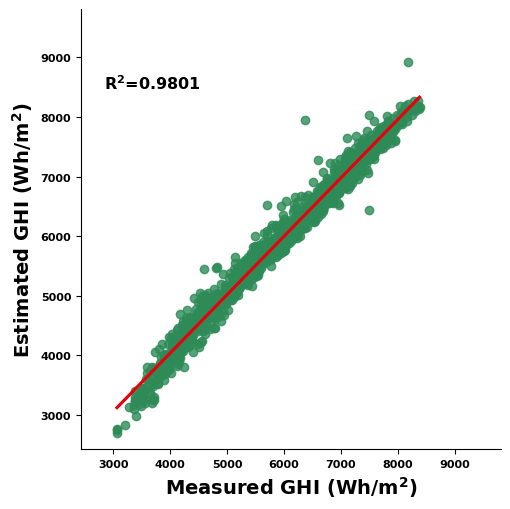

MAE: 131.49515656058676
MSE: 31567.486349060408
RMSE: 177.6724130220007
R^2: 0.9800514477558124
Pearson correlation: 0.9899754783608595


In [46]:
# Evaluate on training data
model = LinearRegression()
model.fit(X_train_scaled, y_train)
predictions_train = model.predict(X_train_scaled)
evaluate(y_train, predictions_train, 'Training data', 'LR', loc=(1.3, 1.09, 33))


In [47]:
# Measure training time
lm = LinearRegression()
start_train_time = time.time()
lm.fit(X_train_scaled, y_train)
end_train_time = time.time()
train_time = round(end_train_time - start_train_time, 2)

# Print training time
print(f"Training time: {train_time} seconds")

# Check data ranges with rounded values
print("y range:", round(min(y.values[:100]), 2), round(max(y.values[:100]), 2))
print("predictions range:", round(min(predictions_train[:100]), 2), round(max(predictions_train[:100]), 2))

Training time: 0.01 seconds
y range: 4327.0 7908.5
predictions range: 3101.53 8036.85


In [48]:
# Recreate the timestamp column (only for plotting purposes)
timestamps = pd.to_datetime(dict(
    year=data['Year'],
    month=data['Month'],
    day=data['Day'],
    hour=data['Hour']
))


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


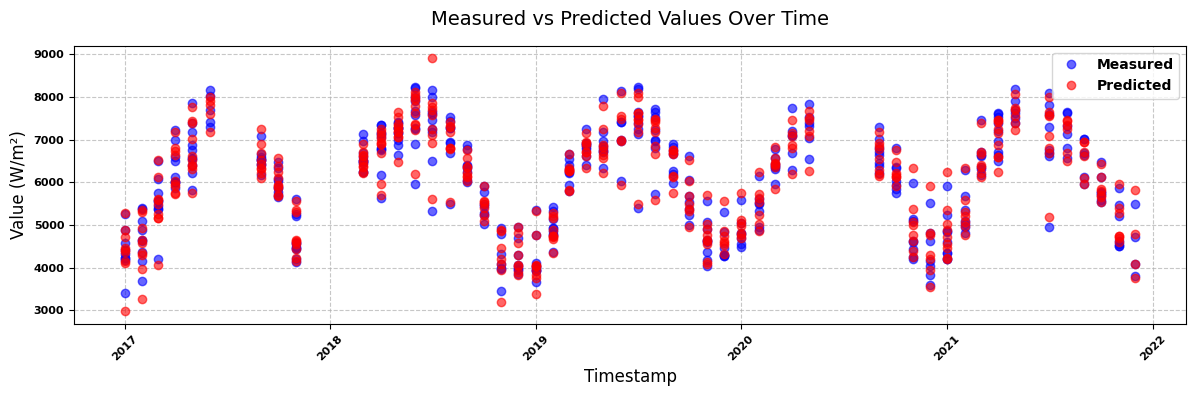

In [49]:
plt.figure(figsize=(12, 4), dpi=100)

plt.plot(timestamps[:400], y.values[:400], 'o', c='blue', alpha=0.6, markersize=6, label='Measured')
plt.plot(timestamps[:400], lm.predict(scaler.fit_transform(X)[:400]), 'o', c='red', alpha=0.6, markersize=6, label='Predicted')

plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Timestamp', fontsize=12)
plt.ylabel('Value (W/m²)', fontsize=12)
plt.title('Measured vs Predicted Values Over Time', fontsize=14, pad=15)
plt.xticks(rotation=45)
plt.legend(fontsize=10, loc='best')
plt.tight_layout()

plt.savefig('LR_measured_vs_predicted.png', dpi=300, bbox_inches='tight')

plt.show()


Testing time: 0.0 sec


<ipython-input-8-95a1f5c463d0>:10: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_test = y_test.ravel()


<Figure size 590.551x590.551 with 0 Axes>

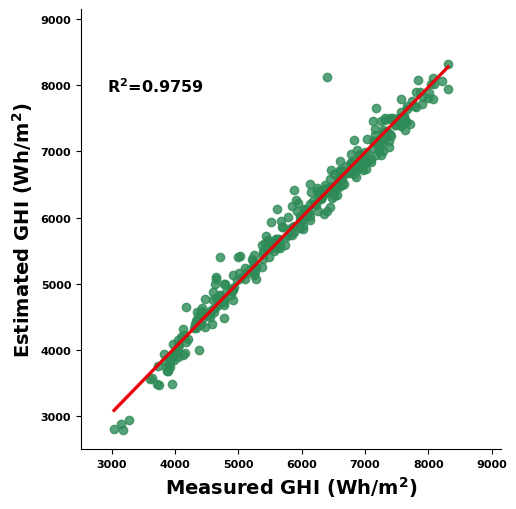

MAE: 128.71495368817142
MSE: 36862.363790610776
RMSE: 191.99573899076714
R^2: 0.975868180412991
Pearson correlation: 0.9878859427563944


In [50]:

# Measure testing time
t1 = time.time()
predictions = model.predict(X_test_scaled)
test_time = round(time.time() - t1, 2)
print(f'Testing time: {test_time} sec')

# Evaluate on testing data
evaluate(y_test, predictions, 'Testing data', 'LR', loc=(1.3, 1.09, 33))

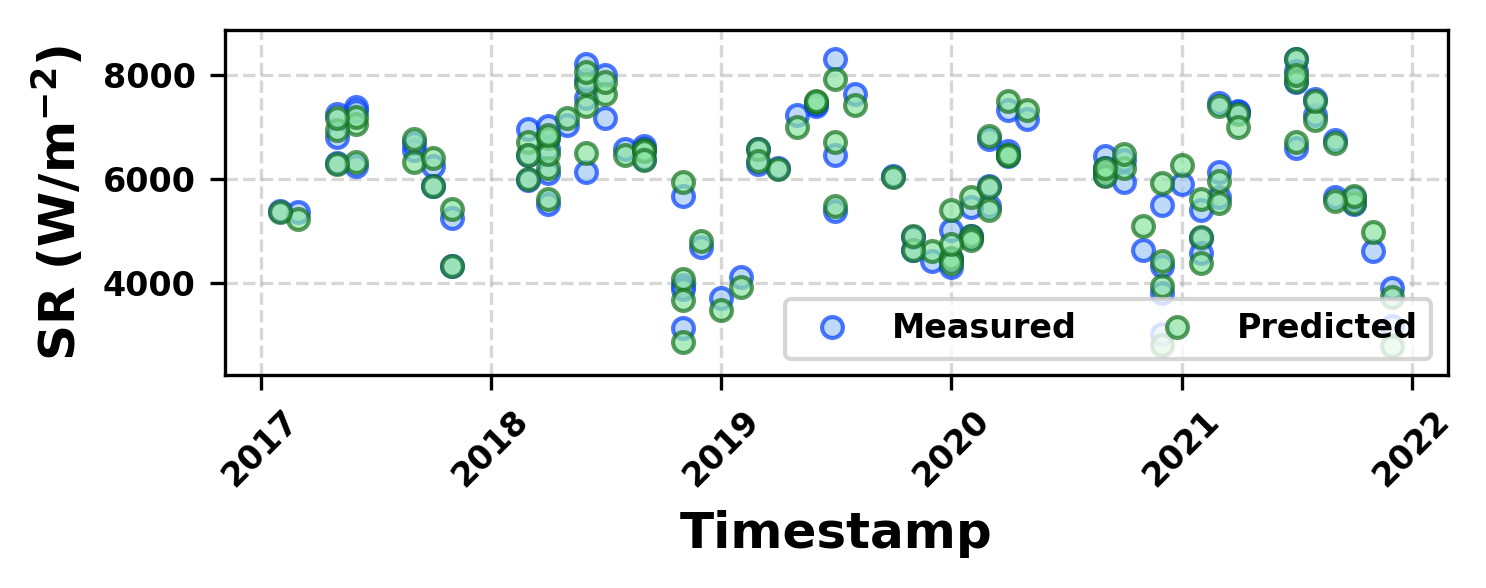

Using 100 samples
Timestamps from 2018-04-01 00:00:00 to 2017-05-01 00:00:00


In [52]:

# Define range within test set
start_idx = 0
end_idx = min(100, len(y_test))  # safer index

# Convert predictions to Series
predictions = pd.Series(predictions, index=y_test.index)

# Extract slices
y_true_slice = y_test.iloc[start_idx:end_idx]
y_pred_slice = predictions.iloc[start_idx:end_idx]

# Use original indices to fetch timestamps from full data
original_indices = y_true_slice.index
timestamps_test = pd.to_datetime(dict(
    year=data.loc[original_indices, 'Year'].values,
    month=data.loc[original_indices, 'Month'].values,
    day=data.loc[original_indices, 'Day'].values,
    hour=data.loc[original_indices, 'Hour'].values
))

# Confirm alignment
assert len(timestamps_test) == len(y_true_slice) == len(y_pred_slice)

# Plotting
plt.figure(figsize=(5, 2), dpi=300)

y_min = min(y_true_slice.min(), y_pred_slice.min())
y_max = max(y_true_slice.max(), y_pred_slice.max())
y_buffer = (y_max - y_min) * 0.1

plt.plot(timestamps_test, y_true_slice, linewidth=0, marker='o', markersize=5,
         markerfacecolor=sns.color_palette("pastel")[0], markeredgecolor=sns.color_palette("bright")[0],
         alpha=0.7, label='Measured')

plt.plot(timestamps_test, y_pred_slice, linewidth=0, marker='o', markersize=5,
         markerfacecolor=sns.color_palette("pastel")[2], markeredgecolor=sns.color_palette("dark")[2],
         alpha=0.7, label='Predicted')

plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel('Timestamp', fontsize=12, fontfamily='sans-serif', weight='bold')
plt.ylabel('SR (W/m$^{-2}$)', fontsize=12, fontfamily='sans-serif', weight='bold')
plt.legend(loc='lower right', ncol=2, fontsize=8, framealpha=0.8)
plt.ylim(y_min - y_buffer, y_max + y_buffer)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Linear_Regression_Testing_Time_Timestamp.pdf', bbox_inches='tight', dpi=300, format='pdf')
plt.show()

# Diagnostics
print(f"Using {len(y_true_slice)} samples")
print(f"Timestamps from {timestamps_test.iloc[0]} to {timestamps_test.iloc[-1]}")


In [53]:
# Perform 10-fold cross-validation
lm_cv = LinearRegression()
scoring_metrics = {
    'mae': 'neg_mean_absolute_error',
    'mse': 'neg_mean_squared_error',
    'r2': 'r2'
}
scores = cross_validate(lm_cv, X_train_scaled, y_train, cv=10, scoring=scoring_metrics, return_train_score=True)
rmse_scores = np.sqrt(-scores['test_mse'])

# Print cross-validation results with rounded values
print("\n=== 10-Fold Cross-Validation Results ===")
print(f"Mean Absolute Error (MAE):  {round(-scores['test_mae'].mean(), 2)} ± {round(scores['test_mae'].std(), 2)}")
print(f"Mean Squared Error (MSE):   {round(-scores['test_mse'].mean(), 2)} ± {round(scores['test_mse'].std(), 2)}")
print(f"Root Mean Squared Error (RMSE): {round(rmse_scores.mean(), 2)} ± {round(rmse_scores.std(), 2)}")
print(f"R-squared (R²):            {round(scores['test_r2'].mean(), 2)} ± {round(scores['test_r2'].std(), 2)}")


=== 10-Fold Cross-Validation Results ===
Mean Absolute Error (MAE):  135.94 ± 12.05
Mean Squared Error (MSE):   39990.28 ± 23383.73
Root Mean Squared Error (RMSE): 193.74 ± 49.53
R-squared (R²):            0.97 ± 0.02


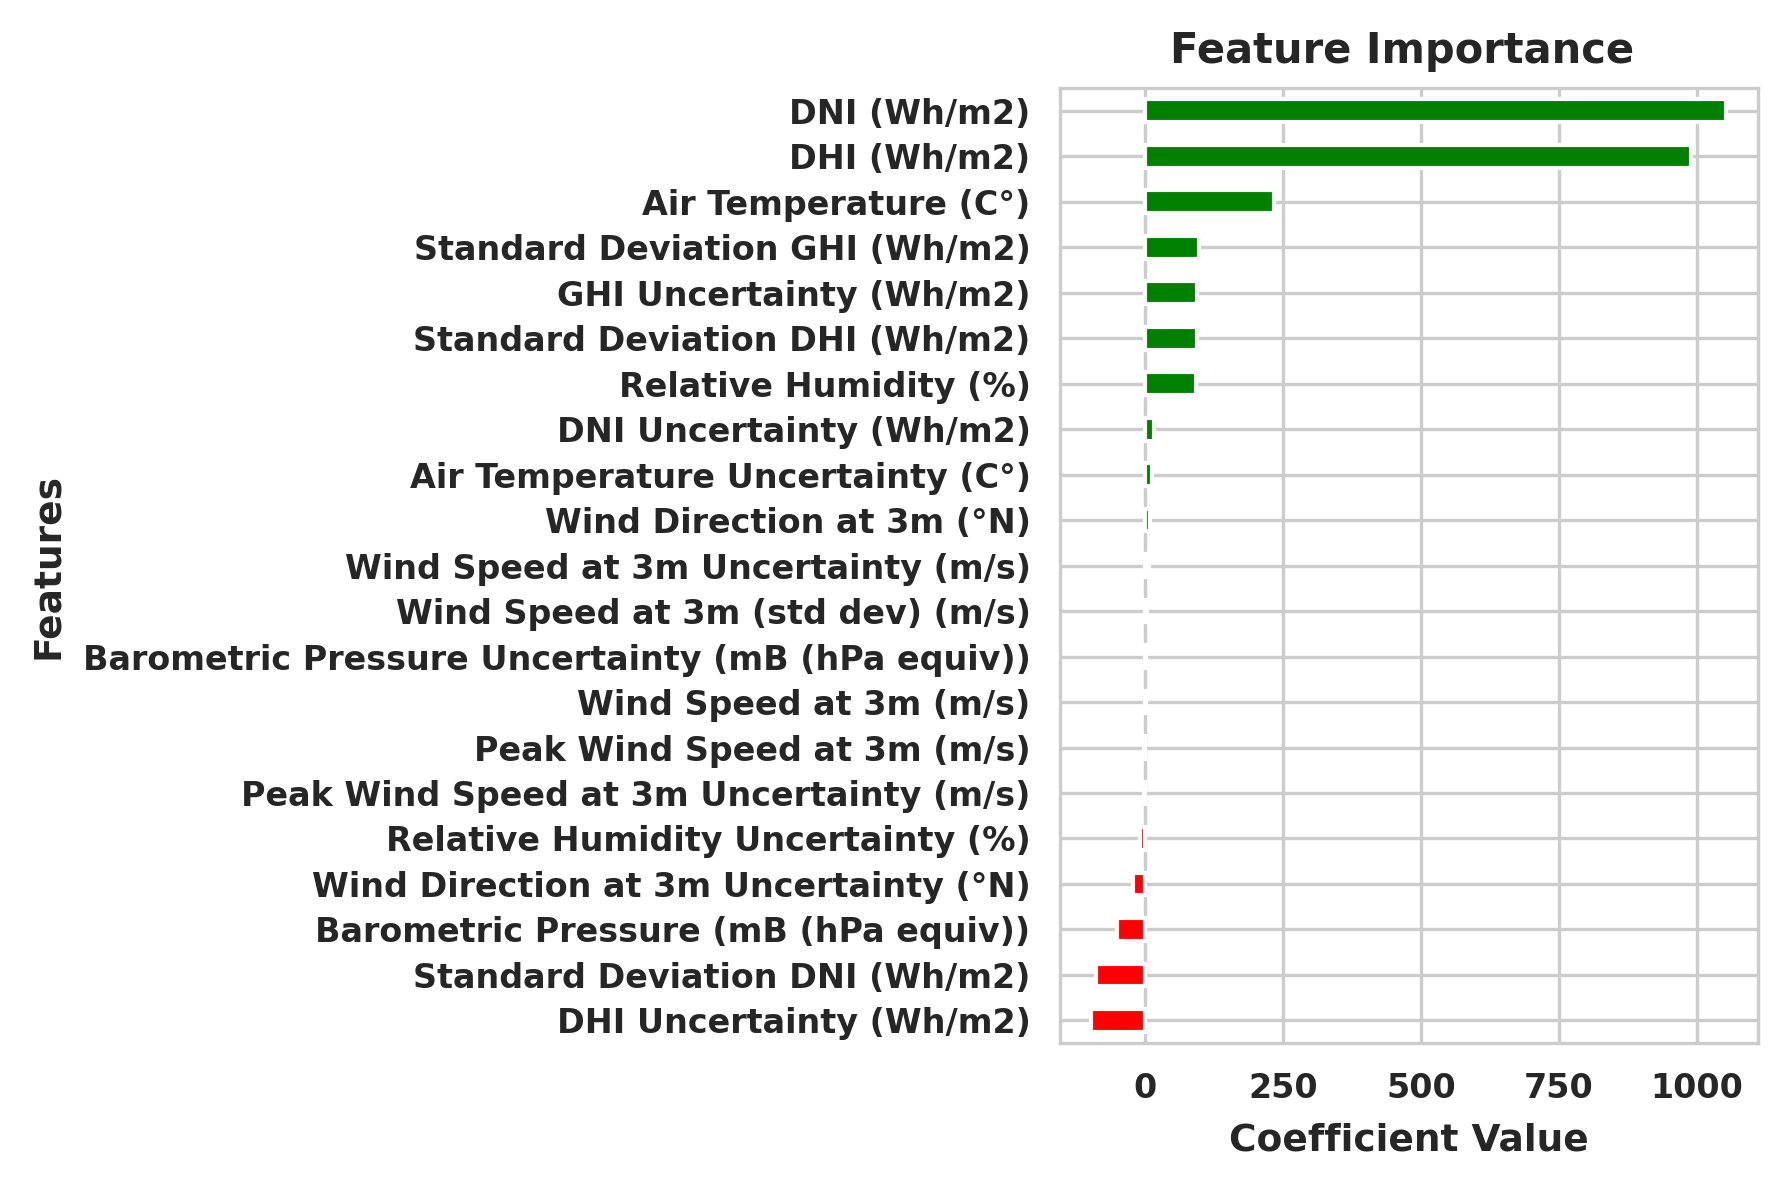

In [60]:
importance = pd.Series(model.coef_, index=X_train.columns)
# Sort importances
importance_sorted = importance.sort_values(ascending=True)  # ascending for horizontal bar plot

# Set up plot
plt.figure(figsize=(6, 4), dpi=300)
sns.set_style("whitegrid")

# Create horizontal bar plot
colors = ['green' if val >= 0 else 'red' for val in importance_sorted]
importance_sorted.plot(kind='barh', color=colors)

# Formatting
plt.title('Feature Importance ', fontsize=10, weight='bold')
plt.xlabel('Coefficient Value', fontsize=9, weight='bold')
plt.ylabel('Features', fontsize=9, weight='bold')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()

# Save the plot
plt.savefig('feature_importance.pdf', format='pdf', bbox_inches='tight', dpi=300)
plt.show()


In [61]:
# Save the trained model and scaler
joblib.dump(model, 'linear_regression_model_normalized_with_roundoff.pkl')
joblib.dump(scaler, 'linear_regression_standard_scaler_normalized_with_roundoff.pkl')

['linear_regression_standard_scaler_normalized_with_roundoff.pkl']

In [62]:
# New input data from the user
user_input = {
    "Air Temperature (C°)": 200.00,
    "Air Temperature Uncertainty (C°)": 0.50,
    "Wind Direction at 3m (°N)": 180.00,
    "Wind Direction at 3m Uncertainty (°N)": 5.00,
    "Wind Speed at 3m (m/s)": 3.59,
    "Wind Speed at 3m Uncertainty (m/s)": 0.10,
    "Wind Speed at 3m (std dev) (m/s)": 0.2,
    "DHI (Wh/m2)": 2344.29,
    "DHI Uncertainty (Wh/m2)": 10.00,
    "Standard Deviation DHI (Wh/m2)": 1.00,
    "DNI (Wh/m2)": 7223.12,
    "DNI Uncertainty (Wh/m2)": 12.00,
    "Standard Deviation DNI (Wh/m2)": 1.50,
    "GHI Uncertainty (Wh/m2)": 20.00,
    "Standard Deviation GHI (Wh/m2)": 2.00,
    "Peak Wind Speed at 3m (m/s)": 4.20,
    "Peak Wind Speed at 3m Uncertainty (m/s)": 0.20,
    "Relative Humidity (%)": 21.77,
    "Relative Humidity Uncertainty (%)": 2.50,
    "Barometric Pressure (mB (hPa equiv))": 927.85,
    "Barometric Pressure Uncertainty (mB (hPa equiv))": 0.30
}

# Convert the user input to DataFrame
user_input_df = pd.DataFrame([user_input])

# Ensure the columns are in the same order as the training data
user_input_df = user_input_df[
    [
        "Air Temperature (C°)", "Air Temperature Uncertainty (C°)",
        "Wind Direction at 3m (°N)", "Wind Direction at 3m Uncertainty (°N)",
        "Wind Speed at 3m (m/s)", "Wind Speed at 3m Uncertainty (m/s)",
        "Wind Speed at 3m (std dev) (m/s)", "DHI (Wh/m2)",
        "DHI Uncertainty (Wh/m2)", "Standard Deviation DHI (Wh/m2)",
        "DNI (Wh/m2)", "DNI Uncertainty (Wh/m2)", "Standard Deviation DNI (Wh/m2)",
        "GHI Uncertainty (Wh/m2)", "Standard Deviation GHI (Wh/m2)",
        "Peak Wind Speed at 3m (m/s)", "Peak Wind Speed at 3m Uncertainty (m/s)",
        "Relative Humidity (%)", "Relative Humidity Uncertainty (%)",
        "Barometric Pressure (mB (hPa equiv))", "Barometric Pressure Uncertainty (mB (hPa equiv))"
    ]
]

# Scale the user input data
user_input_scaled = scaler.transform(user_input_df)
user_input_scaled_df = pd.DataFrame(user_input_scaled, columns=user_input_df.columns)

# Predict GHI using the trained Linear Regression model
predicted_ghi = lm.predict(user_input_scaled_df)

# Display the predicted GHI with rounded value
print(f"Predicted GHI: {round(predicted_ghi[0], 2)} Wh/m²")

Predicted GHI: 13277.55 Wh/m²


RF

**Initialize & Train Model**

In [63]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time
import joblib

# Define the target variable
y = data['GHI (Wh/m2)']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure columns are strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

# Convert scaled data back to DataFrame to preserve column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# Initialize Random Forest
rf_model = RandomForestRegressor(
    n_estimators=100,  # Number of trees
    max_depth=10,      # Prevent overfitting
    random_state=42    # Reproducibility
)

# Measure training time
start_time = time.time()
rf_model.fit(X_train_scaled, y_train)
train_time = round(time.time() - start_time, 2)
print(f"Training time: {train_time} seconds")

# Predictions
train_predictions = rf_model.predict(X_train_scaled)
test_predictions = rf_model.predict(X_test_scaled)

# Evaluate
evaluate(y_train, train_predictions, 'Training_data', 'RF', loc=(1.3, 1.09, 33))
evaluate(y_test, test_predictions, 'Testing_data', 'RF', loc=(1.3, 1.09, 33))

plt.show()

Training time: 1.61 seconds


<ipython-input-8-95a1f5c463d0>:10: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_test = y_test.ravel()


<Figure size 590.551x590.551 with 0 Axes>

MAE: 73.82888226344207
MSE: 9550.122509016206
RMSE: 97.72472823710592
R^2: 0.9939649576243447
Pearson correlation: 0.9973670321336987


<ipython-input-8-95a1f5c463d0>:10: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_test = y_test.ravel()


<Figure size 590.551x590.551 with 0 Axes>

MAE: 168.53372065052784
MSE: 55406.04792662305
RMSE: 235.38489315719275
R^2: 0.9637286214148046
Pearson correlation: 0.9829329108561976


In [64]:
# Predict on Test Set
t1 = time.time()
rf_predictions = rf_model.predict(X_test_scaled)
test_time = round(time.time() - t1, 2)
print(f'Testing time: {test_time} sec')

# Evaluation Metrics with rounded values
print("MAE:", round(mean_absolute_error(y_test, rf_predictions), 2))
print("MSE:", round(mean_squared_error(y_test, rf_predictions), 2))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, rf_predictions)), 2))
print("R² Score:", round(r2_score(y_test, rf_predictions), 2))


Testing time: 0.02 sec
MAE: 168.53
MSE: 55406.05
RMSE: 235.38
R² Score: 0.96


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


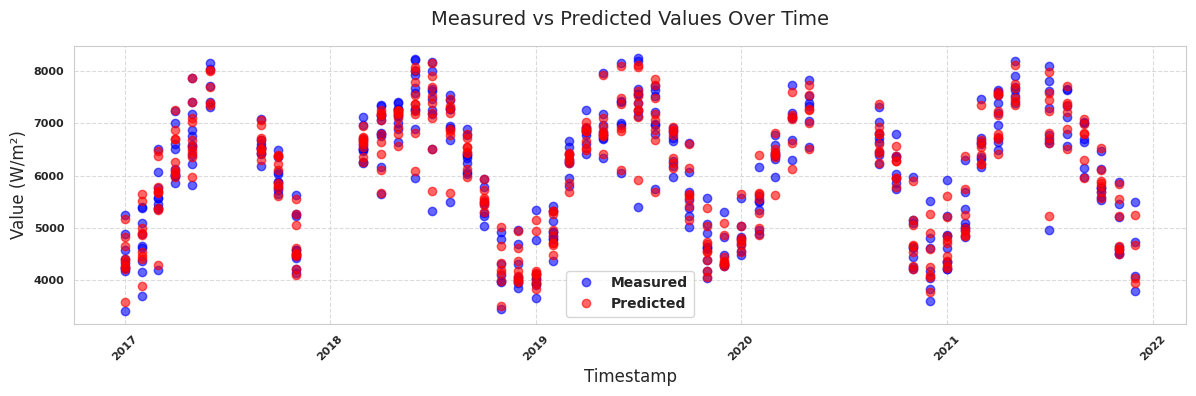

In [70]:
plt.figure(figsize=(12, 4), dpi=100)

plt.plot(timestamps[:400], y.values[:400], 'o', c='blue', alpha=0.6, markersize=6, label='Measured')
plt.plot(timestamps[:400], rf_model.predict(scaler.fit_transform(X)[:400]), 'o', c='red', alpha=0.6, markersize=6, label='Predicted')

plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Timestamp', fontsize=12)
plt.ylabel('Value (W/m²)', fontsize=12)
plt.title('Measured vs Predicted Values Over Time', fontsize=14, pad=15)
plt.xticks(rotation=45)
plt.legend(fontsize=10, loc='best')
plt.tight_layout()

plt.savefig('RF_measured_vs_predicted.png', dpi=300, bbox_inches='tight')

plt.show()

In [102]:
# Convert predictions to Series
rf_predictions= pd.Series(rf_predictions, index=y_test.index)

# Define range within test set
start_idx = 0
end_idx = min(100, len(y_test))  # safer index

# Extract slices
y_true_slice = y_test.iloc[start_idx:end_idx]
y_pred_slice = predictions.iloc[start_idx:end_idx]

# Use original indices to fetch timestamps from full data
original_indices = y_true_slice.index
timestamps_test = pd.to_datetime(dict(
    year=data.loc[original_indices, 'Year'].values,
    month=data.loc[original_indices, 'Month'].values,
    day=data.loc[original_indices, 'Day'].values,
    hour=data.loc[original_indices, 'Hour'].values
))

# Confirm alignment
assert len(timestamps_test) == len(y_true_slice) == len(y_pred_slice)

# Plotting
plt.figure(figsize=(5, 2), dpi=300)

y_min = min(y_true_slice.min(), y_pred_slice.min())
y_max = max(y_true_slice.max(), y_pred_slice.min())
y_buffer = (y_max - y_min) * 0.1

plt.plot(timestamps_test, y_true_slice, linewidth=0, marker='o', markersize=5,
         markerfacecolor=sns.color_palette("pastel")[0], markeredgecolor=sns.color_palette("bright")[0],
         alpha=0.7, label='Measured')

plt.plot(timestamps_test, y_pred_slice, linewidth=0, marker='o', markersize=5,
         markerfacecolor=sns.color_palette("pastel")[2], markeredgecolor=sns.color_palette("dark")[2],
         alpha=0.7, label='Predicted')

plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel('Timestamp', fontsize=12, fontfamily='sans-serif', weight='bold')
plt.ylabel('SR (W/m$^{-2}$)', fontsize=12, fontfamily='sans-serif', weight='bold')
plt.legend(loc='lower right', ncol=2, fontsize=8, framealpha=0.8)
plt.ylim(y_min - y_buffer, y_max + y_buffer)
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot
plt.savefig('Random_Forest_Testing_Time_Timestamp.png', bbox_inches='tight', dpi=300, format='png')
plt.show()

# Diagnostics
print(f"Using {len(y_true_slice)} samples")
print(f"Timestamps from {timestamps_test.iloc[0]} to {timestamps_test.iloc[-1]}")

Using 100 samples
Timestamps from 2018-04-01 00:00:00 to 2017-05-01 00:00:00


In [71]:
# Cross-Validation
rf_cv_model = RandomForestRegressor(n_estimators=100, random_state=42)
scoring_metrics = {
    'mae': 'neg_mean_absolute_error',
    'mse': 'neg_mean_squared_error',
    'r2': 'r2'
}
rf_scores = cross_validate(rf_cv_model, X_train_scaled, y_train,
                           cv=10, scoring=scoring_metrics, return_train_score=True)
rf_rmse_scores = np.sqrt(-rf_scores['test_mse'])

# Print CV results with rounded values
print("\n=== Random Forest 10-Fold CV Results ===")
print(f"MAE:  {round(-rf_scores['test_mae'].mean(), 2)} ± {round(rf_scores['test_mae'].std(), 2)}")
print(f"MSE:  {round(-rf_scores['test_mse'].mean(), 2)} ± {round(rf_scores['test_mse'].std(), 2)}")
print(f"RMSE: {round(rf_rmse_scores.mean(), 2)} ± {round(rf_rmse_scores.std(), 2)}")
print(f"R²:   {round(rf_scores['test_r2'].mean(), 2)} ± {round(rf_scores['test_r2'].std(), 2)}")


=== Random Forest 10-Fold CV Results ===
MAE:  167.8 ± 24.33
MSE:  53770.46 ± 16650.72
RMSE: 229.34 ± 34.25
R²:   0.97 ± 0.01


In [72]:
# Save the trained model and scaler
joblib.dump(rf_model, 'rf_normalised.pkl')
joblib.dump(scaler, 'standard_scaler_rf_normalised.pkl')

['standard_scaler_rf_normalised.pkl']

In [73]:
# New input data from the user
user_input = {
    "Air Temperature (C°)": 200.00,
    "Air Temperature Uncertainty (C°)": 0.50,
    "Wind Direction at 3m (°N)": 180.00,
    "Wind Direction at 3m Uncertainty (°N)": 5.00,
    "Wind Speed at 3m (m/s)": 3.59,
    "Wind Speed at 3m Uncertainty (m/s)": 0.10,
    "Wind Speed at 3m (std dev) (m/s)": 0.20,
    "DHI (Wh/m2)": 2344.29,
    "DHI Uncertainty (Wh/m2)": 10.00,
    "Standard Deviation DHI (Wh/m2)": 1.00,
    "DNI (Wh/m2)": 7223.12,
    "DNI Uncertainty (Wh/m2)": 12.00,
    "Standard Deviation DNI (Wh/m2)": 1.50,
    "GHI Uncertainty (Wh/m2)": 20.00,
    "Standard Deviation GHI (Wh/m2)": 2.00,
    "Peak Wind Speed at 3m (m/s)": 4.20,
    "Peak Wind Speed at 3m Uncertainty (m/s)": 0.20,
    "Relative Humidity (%)": 21.77,
    "Relative Humidity Uncertainty (%)": 2.50,
    "Barometric Pressure (mB (hPa equiv))": 927.85,
    "Barometric Pressure Uncertainty (mB (hPa equiv))": 0.30
}

# Convert the user input to DataFrame
user_input_df = pd.DataFrame([user_input])

# Ensure the columns are in the same order as the training data
user_input_df = user_input_df[
    [
        "Air Temperature (C°)", "Air Temperature Uncertainty (C°)",
        "Wind Direction at 3m (°N)", "Wind Direction at 3m Uncertainty (°N)",
        "Wind Speed at 3m (m/s)", "Wind Speed at 3m Uncertainty (m/s)",
        "Wind Speed at 3m (std dev) (m/s)", "DHI (Wh/m2)",
        "DHI Uncertainty (Wh/m2)", "Standard Deviation DHI (Wh/m2)",
        "DNI (Wh/m2)", "DNI Uncertainty (Wh/m2)", "Standard Deviation DNI (Wh/m2)",
        "GHI Uncertainty (Wh/m2)", "Standard Deviation GHI (Wh/m2)",
        "Peak Wind Speed at 3m (m/s)", "Peak Wind Speed at 3m Uncertainty (m/s)",
        "Relative Humidity (%)", "Relative Humidity Uncertainty (%)",
        "Barometric Pressure (mB (hPa equiv))", "Barometric Pressure Uncertainty (mB (hPa equiv))"
    ]
]

# Scale the user input data
user_input_scaled = scaler.transform(user_input_df)
user_input_scaled_df = pd.DataFrame(user_input_scaled, columns=user_input_df.columns)

# Predict GHI using the trained Random Forest model
predicted_ghi = rf_model.predict(user_input_scaled_df)

# Display the predicted GHI with rounded value
print(f"Predicted GHI: {round(predicted_ghi[0], 2)} Wh/m²")

Predicted GHI: 7251.32 Wh/m²


Decision Tree


Initialization and Model Training


Training time: 0.02 seconds


<ipython-input-8-95a1f5c463d0>:10: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_test = y_test.ravel()


<Figure size 590.551x590.551 with 0 Axes>

MAE: 72.94780440092678
MSE: 15377.904393603865
RMSE: 124.0076787687112
R^2: 0.9902821870005795
Pearson correlation: 0.9951292313064569


<ipython-input-8-95a1f5c463d0>:10: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_test = y_test.ravel()


<Figure size 590.551x590.551 with 0 Axes>

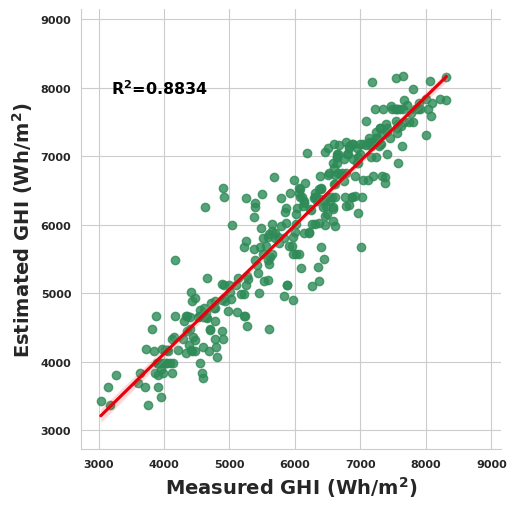

MAE: 307.6338490517747
MSE: 178101.08415590768
RMSE: 422.02024140544216
R^2: 0.8834067382245359
Pearson correlation: 0.9414488337555225


In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time
import joblib

# Define the target variable
y = data['GHI (Wh/m2)']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure columns are strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

# Convert scaled data back to DataFrame to preserve column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# Initialize Decision Tree
dt_model = DecisionTreeRegressor(
    max_depth=10,      # Control overfitting
    random_state=42    # Reproducibility
)

# Measure training time
start_time = time.time()
dt_model.fit(X_train_scaled, y_train)
train_time = round(time.time() - start_time, 2)
print(f"Training time: {train_time} seconds")

# Predictions
train_predictions = dt_model.predict(X_train_scaled)
test_predictions = dt_model.predict(X_test_scaled)

# Evaluate
evaluate(y_train, train_predictions, 'Training_data', 'DT', loc=(1.3, 1.09, 33))
evaluate(y_test, test_predictions, 'Testing_data', 'DT', loc=(1.3, 1.09, 33))

plt.show()

In [75]:
# Predict on Test Set with timing
t1 = time.time()
dt_predictions = dt_model.predict(X_test_scaled)
test_time = round(time.time() - t1, 2)
print(f'Testing time: {test_time} sec')

# Evaluation Metrics with rounded values
print("MAE:", round(mean_absolute_error(y_test, dt_predictions), 2))
print("MSE:", round(mean_squared_error(y_test, dt_predictions), 2))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, dt_predictions)), 2))
print("R² Score:", round(r2_score(y_test, dt_predictions), 2))

Testing time: 0.0 sec
MAE: 307.63
MSE: 178101.08
RMSE: 422.02
R² Score: 0.88


Measured vs Predicted Scatter

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


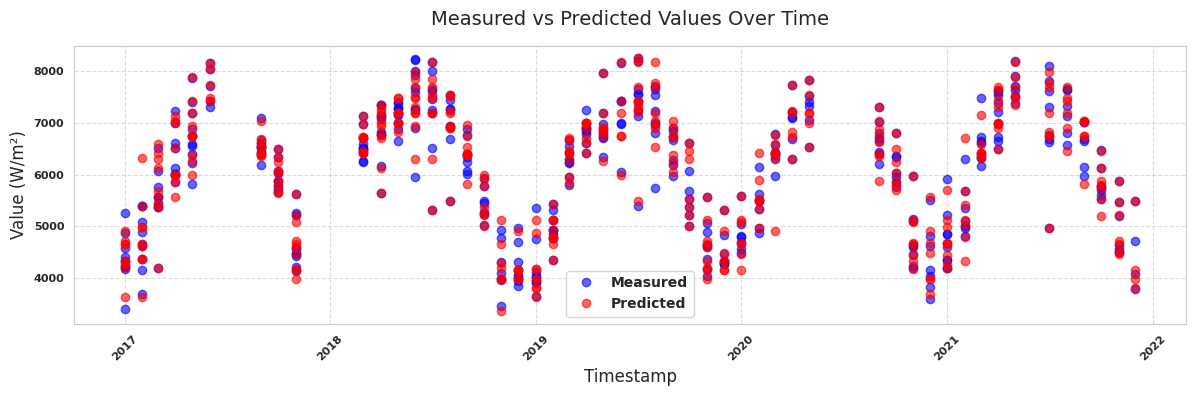

In [77]:
plt.figure(figsize=(12, 4), dpi=100)

plt.plot(timestamps[:400], y.values[:400], 'o', c='blue', alpha=0.6, markersize=6, label='Measured')
plt.plot(timestamps[:400], dt_model.predict(scaler.fit_transform(X)[:400]), 'o', c='red', alpha=0.6, markersize=6, label='Predicted')

plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Timestamp', fontsize=12)
plt.ylabel('Value (W/m²)', fontsize=12)
plt.title('Measured vs Predicted Values Over Time', fontsize=14, pad=15)
plt.xticks(rotation=45)
plt.legend(fontsize=10, loc='best')
plt.tight_layout()

plt.savefig('DT_measured_vs_predicted.png', dpi=300, bbox_inches='tight')

plt.show()


Testing Timestamp

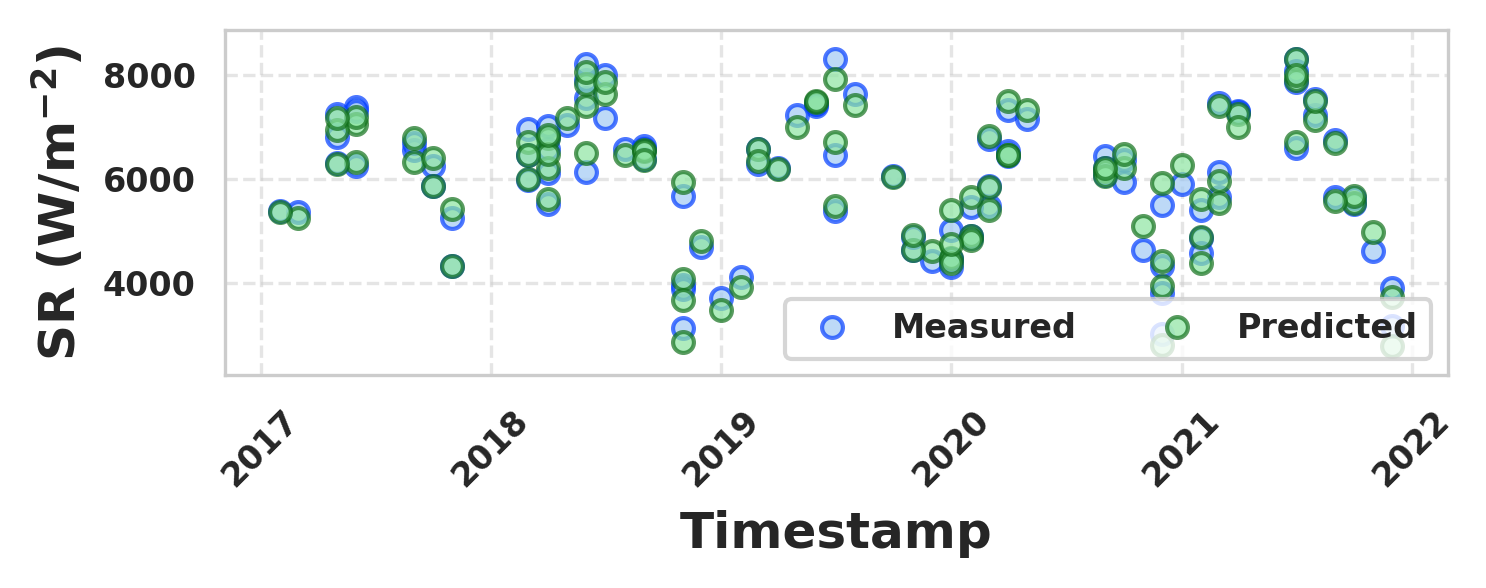

Using 100 samples
Timestamps from 2018-04-01 00:00:00 to 2017-05-01 00:00:00


In [101]:
# Convert predictions to Series
dt_predictions = pd.Series(dt_predictions, index=y_test.index)

# Define range within test set
start_idx = 0
end_idx = min(100, len(y_test))  # safer index

# Extract slices
y_true_slice = y_test.iloc[start_idx:end_idx]
y_pred_slice = dt_predictions.iloc[start_idx:end_idx]

# Use original indices to fetch timestamps from full data
original_indices = y_true_slice.index
timestamps_test = pd.to_datetime(dict(
    year=data.loc[original_indices, 'Year'].values,
    month=data.loc[original_indices, 'Month'].values,
    day=data.loc[original_indices, 'Day'].values,
    hour=data.loc[original_indices, 'Hour'].values
))

# Confirm alignment
assert len(timestamps_test) == len(y_true_slice) == len(y_pred_slice)

# Plotting
plt.figure(figsize=(5, 2), dpi=300)

y_min = min(y_true_slice.min(), y_pred_slice.min())
y_max = max(y_true_slice.max(), y_pred_slice.min())
y_buffer = (y_max - y_min) * 0.1

plt.plot(timestamps_test, y_true_slice, linewidth=0, marker='o', markersize=5,
         markerfacecolor=sns.color_palette("pastel")[0], markeredgecolor=sns.color_palette("bright")[0],
         alpha=0.7, label='Measured')

plt.plot(timestamps_test, y_pred_slice, linewidth=0, marker='o', markersize=5,
         markerfacecolor=sns.color_palette("pastel")[2], markeredgecolor=sns.color_palette("dark")[2],
         alpha=0.7, label='Predicted')

plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel('Timestamp', fontsize=12, fontfamily='sans-serif', weight='bold')
plt.ylabel('SR (W/m$^{-2}$)', fontsize=12, fontfamily='sans-serif', weight='bold')
plt.legend(loc='lower right', ncol=2, fontsize=8, framealpha=0.8)
plt.ylim(y_min - y_buffer, y_max + y_buffer)
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot
plt.savefig('Decision_Tree_Testing_Time_Timestamp.png', bbox_inches='tight', dpi=300, format='png')
plt.show()

# Diagnostics
print(f"Using {len(y_true_slice)} samples")
print(f"Timestamps from {timestamps_test.iloc[0]} to {timestamps_test.iloc[-1]}")

Cross Validation

In [79]:
# Cross-Validation
dt_cv_model = DecisionTreeRegressor(max_depth=10, random_state=42)
scoring_metrics = {
    'mae': 'neg_mean_absolute_error',
    'mse': 'neg_mean_squared_error',
    'r2': 'r2'
}
dt_scores = cross_validate(dt_cv_model, X_train_scaled, y_train,
                           cv=10, scoring=scoring_metrics, return_train_score=True)
dt_rmse_scores = np.sqrt(-dt_scores['test_mse'])

# Print CV results with rounded values
print("\n=== Decision Tree 10-Fold CV Results ===")
print(f"MAE:  {round(-dt_scores['test_mae'].mean(), 2)} ± {round(dt_scores['test_mae'].std(), 2)}")
print(f"MSE:  {round(-dt_scores['test_mse'].mean(), 2)} ± {round(dt_scores['test_mse'].std(), 2)}")
print(f"RMSE: {round(dt_rmse_scores.mean(), 2)} ± {round(dt_rmse_scores.std(), 2)}")
print(f"R²:   {round(dt_scores['test_r2'].mean(), 2)} ± {round(dt_scores['test_r2'].std(), 2)}")


=== Decision Tree 10-Fold CV Results ===
MAE:  308.38 ± 31.22
MSE:  201805.76 ± 52940.32
RMSE: 445.55 ± 57.4
R²:   0.87 ± 0.03


In [80]:
# Save the trained model and scaler
joblib.dump(dt_model, 'dt_model_normalised.pkl')
joblib.dump(scaler, 'standard_scaler_dt_normalised.pkl')

['standard_scaler_dt_normalised.pkl']

In [81]:
# New input data from the user
user_input = {
    "Air Temperature (C°)": 200.00,
    "Air Temperature Uncertainty (C°)": 0.50,
    "Wind Direction at 3m (°N)": 180.00,
    "Wind Direction at 3m Uncertainty (°N)": 5.00,
    "Wind Speed at 3m (m/s)": 3.59,
    "Wind Speed at 3m Uncertainty (m/s)": 0.10,
    "Wind Speed at 3m (std dev) (m/s)": 0.2,
    "DHI (Wh/m2)": 2344.29,
    "DHI Uncertainty (Wh/m2)": 10.00,
    "Standard Deviation DHI (Wh/m2)": 1.00,
    "DNI (Wh/m2)": 7223.12,
    "DNI Uncertainty (Wh/m2)": 12.00,
    "Standard Deviation DNI (Wh/m2)": 1.50,
    "GHI Uncertainty (Wh/m2)": 20.00,
    "Standard Deviation GHI (Wh/m2)": 2.00,
    "Peak Wind Speed at 3m (m/s)": 4.20,
    "Peak Wind Speed at 3m Uncertainty (m/s)": 0.20,
    "Relative Humidity (%)": 21.77,
    "Relative Humidity Uncertainty (%)": 2.50,
    "Barometric Pressure (mB (hPa equiv))": 927.85,
    "Barometric Pressure Uncertainty (mB (hPa equiv))": 0.30
}

# Convert the user input to DataFrame
user_input_df = pd.DataFrame([user_input])

# Ensure the columns are in the same order as the training data
user_input_df = user_input_df[
    [
        "Air Temperature (C°)", "Air Temperature Uncertainty (C°)",
        "Wind Direction at 3m (°N)", "Wind Direction at 3m Uncertainty (°N)",
        "Wind Speed at 3m (m/s)", "Wind Speed at 3m Uncertainty (m/s)",
        "Wind Speed at 3m (std dev) (m/s)", "DHI (Wh/m2)",
        "DHI Uncertainty (Wh/m2)", "Standard Deviation DHI (Wh/m2)",
        "DNI (Wh/m2)", "DNI Uncertainty (Wh/m2)", "Standard Deviation DNI (Wh/m2)",
        "GHI Uncertainty (Wh/m2)", "Standard Deviation GHI (Wh/m2)",
        "Peak Wind Speed at 3m (m/s)", "Peak Wind Speed at 3m Uncertainty (m/s)",
        "Relative Humidity (%)", "Relative Humidity Uncertainty (%)",
        "Barometric Pressure (mB (hPa equiv))", "Barometric Pressure Uncertainty (mB (hPa equiv))"
    ]
]

# Scale the user input data
user_input_scaled = scaler.transform(user_input_df)
user_input_scaled_df = pd.DataFrame(user_input_scaled, columns=user_input_df.columns)

# Predict GHI using the trained Decision Tree model
predicted_ghi = dt_model.predict(user_input_scaled_df)

# Display the predicted GHI with rounded value
print(f"Predicted GHI: {round(predicted_ghi[0], 2)} Wh/m²")

Predicted GHI: 7647.6 Wh/m²


KNN

Initialization and Model Training


Training time: 0.0 seconds


<ipython-input-8-95a1f5c463d0>:10: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_test = y_test.ravel()


<Figure size 590.551x590.551 with 0 Axes>

MAE: 279.05454131918117
MSE: 136586.67110326007
RMSE: 369.5763400209219
R^2: 0.9136863064029122
Pearson correlation: 0.9568323140179684


<ipython-input-8-95a1f5c463d0>:10: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_test = y_test.ravel()


<Figure size 590.551x590.551 with 0 Axes>

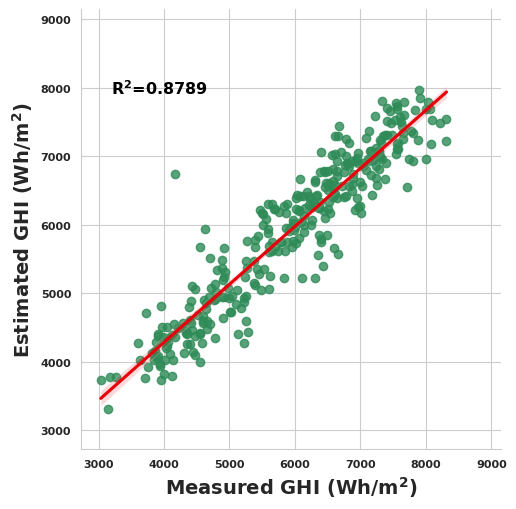

MAE: 321.997393939394
MSE: 185033.1095018182
RMSE: 430.1547506442515
R^2: 0.8788687116896587
Pearson correlation: 0.9382391035086426


In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time
import joblib

# Define the target variable
y = data['GHI (Wh/m2)']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure columns are strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

# Convert scaled data back to DataFrame to preserve column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# Initialize KNN Regressor
knn_model = KNeighborsRegressor(
    n_neighbors=5,   # Default = 5
    weights='uniform',  # Or 'distance' for weighted votes
    metric='minkowski',  # Default distance (Euclidean)
    p=2              # p=2 => Euclidean distance
)

# Measure training time (KNN does minimal computation during fit)
start_time = time.time()
knn_model.fit(X_train_scaled, y_train)
train_time = round(time.time() - start_time, 2)
print(f"Training time: {train_time} seconds")

# Predictions
train_predictions = knn_model.predict(X_train_scaled)
test_predictions = knn_model.predict(X_test_scaled)

# Evaluate
evaluate(y_train, train_predictions, 'Training_data', 'KNN', loc=(1.3, 1.09, 33))
evaluate(y_test, test_predictions, 'Testing_data', 'KNN', loc=(1.3, 1.09, 33))

plt.show()



In [97]:
# Predict on Test Set with timing
t1 = time.time()
knn_predictions = knn_model.predict(X_test_scaled)
test_time = round(time.time() - t1, 2)
print(f'Testing time: {test_time} sec')

# Evaluation Metrics with rounded values
print("MAE:", round(mean_absolute_error(y_test, knn_predictions), 2))
print("MSE:", round(mean_squared_error(y_test, knn_predictions), 2))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, knn_predictions)), 2))
print("R² Score:", round(r2_score(y_test, knn_predictions), 2))


Testing time: 0.01 sec
MAE: 322.0
MSE: 185033.11
RMSE: 430.15
R² Score: 0.88


 Measured vs Predicted Scatter Plot

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


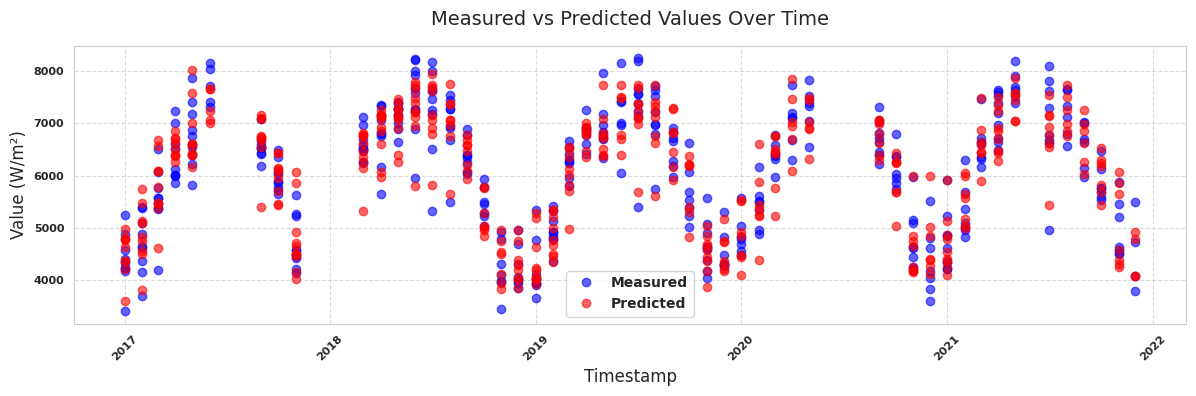

In [98]:
plt.figure(figsize=(12, 4), dpi=100)

plt.plot(timestamps[:400], y.values[:400], 'o', c='blue', alpha=0.6, markersize=6, label='Measured')
plt.plot(timestamps[:400], knn_model.predict(scaler.fit_transform(X)[:400]), 'o', c='red', alpha=0.6, markersize=6, label='Predicted')

plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Timestamp', fontsize=12)
plt.ylabel('Value (W/m²)', fontsize=12)
plt.title('Measured vs Predicted Values Over Time', fontsize=14, pad=15)
plt.xticks(rotation=45)
plt.legend(fontsize=10, loc='best')
plt.tight_layout()

plt.savefig('KNN_measured_vs_predicted.png', dpi=300, bbox_inches='tight')

plt.show()


In [99]:
# Convert predictions to Series
knn_predictions = pd.Series(knn_predictions, index=y_test.index)

# Define range within test set
start_idx = 0
end_idx = min(100, len(y_test))  # safer index

# Extract slices
y_true_slice = y_test.iloc[start_idx:end_idx]
y_pred_slice = knn_predictions.iloc[start_idx:end_idx]

# Use original indices to fetch timestamps from full data
original_indices = y_true_slice.index
timestamps_test = pd.to_datetime(dict(
    year=data.loc[original_indices, 'Year'].values,
    month=data.loc[original_indices, 'Month'].values,
    day=data.loc[original_indices, 'Day'].values,
    hour=data.loc[original_indices, 'Hour'].values
))

# Confirm alignment
assert len(timestamps_test) == len(y_true_slice) == len(y_pred_slice)

# Plotting
plt.figure(figsize=(5, 2), dpi=300)

y_min = min(y_true_slice.min(), y_pred_slice.min())
y_max = max(y_true_slice.max(), y_pred_slice.min())
y_buffer = (y_max - y_min) * 0.1

plt.plot(timestamps_test, y_true_slice, linewidth=0, marker='o', markersize=5,
         markerfacecolor=sns.color_palette("pastel")[0], markeredgecolor=sns.color_palette("bright")[0],
         alpha=0.7, label='Measured')

plt.plot(timestamps_test, y_pred_slice, linewidth=0, marker='o', markersize=5,
         markerfacecolor=sns.color_palette("pastel")[2], markeredgecolor=sns.color_palette("dark")[2],
         alpha=0.7, label='Predicted')

plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel('Timestamp', fontsize=12, fontfamily='sans-serif', weight='bold')
plt.ylabel('SR (W/m$^{-2}$)', fontsize=12, fontfamily='sans-serif', weight='bold')
plt.legend(loc='lower right', ncol=2, fontsize=8, framealpha=0.8)
plt.ylim(y_min - y_buffer, y_max + y_buffer)
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot
plt.savefig('KNN_Testing_Time_Timestamp.png', bbox_inches='tight', dpi=300, format='png')
plt.show()

# Diagnostics
print(f"Using {len(y_true_slice)} samples")
print(f"Timestamps from {timestamps_test.iloc[0]} to {timestamps_test.iloc[-1]}")

Using 100 samples
Timestamps from 2018-04-01 00:00:00 to 2017-05-01 00:00:00


In [87]:
# Cross-Validation
knn_cv_model = KNeighborsRegressor(n_neighbors=5, weights='uniform', metric='minkowski', p=2)
scoring_metrics = {
    'mae': 'neg_mean_absolute_error',
    'mse': 'neg_mean_squared_error',
    'r2': 'r2'
}
knn_scores = cross_validate(knn_cv_model, X_train_scaled, y_train,
                            cv=10, scoring=scoring_metrics, return_train_score=True)
knn_rmse_scores = np.sqrt(-knn_scores['test_mse'])

# Print CV results with rounded values
print("\n=== KNN 10-Fold CV Results ===")
print(f"MAE:  {round(-knn_scores['test_mae'].mean(), 2)} ± {round(knn_scores['test_mae'].std(), 2)}")
print(f"MSE:  {round(-knn_scores['test_mse'].mean(), 2)} ± {round(knn_scores['test_mse'].std(), 2)}")
print(f"RMSE: {round(knn_rmse_scores.mean(), 2)} ± {round(knn_rmse_scores.std(), 2)}")
print(f"R²:   {round(knn_scores['test_r2'].mean(), 2)} ± {round(knn_scores['test_r2'].std(), 2)}")


=== KNN 10-Fold CV Results ===
MAE:  355.15 ± 31.12
MSE:  215790.97 ± 41848.7
RMSE: 462.37 ± 44.76
R²:   0.86 ± 0.03


In [88]:
# Save the trained model and scaler
joblib.dump(knn_model, 'knn_model_normalised.pkl')
joblib.dump(scaler, 'standard_scaler_knn_model.pkl')


['standard_scaler_knn_model.pkl']

In [89]:
# New input data from the user
user_input = {
    "Air Temperature (C°)": 200.0,
    "Air Temperature Uncertainty (C°)": 0.5,
    "Wind Direction at 3m (°N)": 180.0,
    "Wind Direction at 3m Uncertainty (°N)": 5.0,
    "Wind Speed at 3m (m/s)": 3.59,
    "Wind Speed at 3m Uncertainty (m/s)": 0.1,
    "Wind Speed at 3m (std dev) (m/s)": 0.2,
    "DHI (Wh/m2)": 2344.29,
    "DHI Uncertainty (Wh/m2)": 10.0,
    "Standard Deviation DHI (Wh/m2)": 1.0,
    "DNI (Wh/m2)": 7223.12,
    "DNI Uncertainty (Wh/m2)": 12.0,
    "Standard Deviation DNI (Wh/m2)": 1.5,
    "GHI Uncertainty (Wh/m2)": 20.0,
    "Standard Deviation GHI (Wh/m2)": 2.0,
    "Peak Wind Speed at 3m (m/s)": 4.2,
    "Peak Wind Speed at 3m Uncertainty (m/s)": 0.2,
    "Relative Humidity (%)": 21.77,
    "Relative Humidity Uncertainty (%)": 2.5,
    "Barometric Pressure (mB (hPa equiv))": 927.85,
    "Barometric Pressure Uncertainty (mB (hPa equiv))": 0.3
}

# Convert the user input to DataFrame
user_input_df = pd.DataFrame([user_input])

# Ensure the columns are in the same order as the training data
user_input_df = user_input_df[
    [
        "Air Temperature (C°)", "Air Temperature Uncertainty (C°)",
        "Wind Direction at 3m (°N)", "Wind Direction at 3m Uncertainty (°N)",
        "Wind Speed at 3m (m/s)", "Wind Speed at 3m Uncertainty (m/s)",
        "Wind Speed at 3m (std dev) (m/s)", "DHI (Wh/m2)",
        "DHI Uncertainty (Wh/m2)", "Standard Deviation DHI (Wh/m2)",
        "DNI (Wh/m2)", "DNI Uncertainty (Wh/m2)", "Standard Deviation DNI (Wh/m2)",
        "GHI Uncertainty (Wh/m2)", "Standard Deviation GHI (Wh/m2)",
        "Peak Wind Speed at 3m (m/s)", "Peak Wind Speed at 3m Uncertainty (m/s)",
        "Relative Humidity (%)", "Relative Humidity Uncertainty (%)",
        "Barometric Pressure (mB (hPa equiv))", "Barometric Pressure Uncertainty (mB (hPa equiv))"
    ]
]

# Scale the user input data
user_input_scaled = scaler.transform(user_input_df)
user_input_scaled_df = pd.DataFrame(user_input_scaled, columns=user_input_df.columns)

# Predict GHI using the trained KNN model
predicted_ghi = knn_model.predict(user_input_scaled_df)

# Display the predicted GHI with rounded value
print(f"Predicted GHI: {round(predicted_ghi[0], 2)} Wh/m²")

Predicted GHI: 7536.78 Wh/m²


SVR

Initailization and Model Training

Training time: 0.44 seconds


<ipython-input-8-95a1f5c463d0>:10: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_test = y_test.ravel()


<Figure size 590.551x590.551 with 0 Axes>

MAE: 226.30314702248734
MSE: 110031.95212684697
RMSE: 331.71064518168083
R^2: 0.930467122999241
Pearson correlation: 0.9692334303342012


<ipython-input-8-95a1f5c463d0>:10: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_test = y_test.ravel()


<Figure size 590.551x590.551 with 0 Axes>

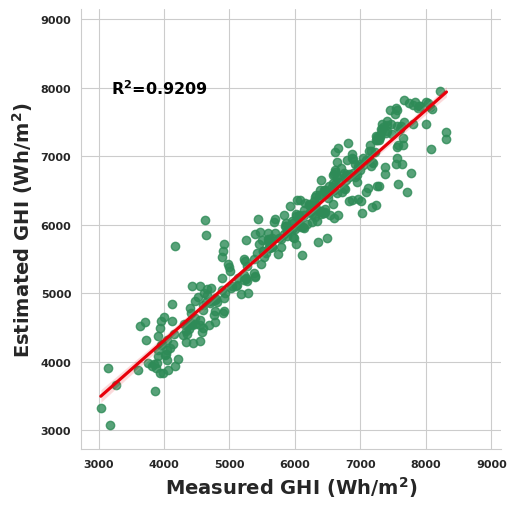

MAE: 240.77228626730124
MSE: 120844.2184533083
RMSE: 347.6265502709888
R^2: 0.920889748296849
Pearson correlation: 0.9640416505624023


In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time
import joblib

# Define the target variable
y = data['GHI (Wh/m2)']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure column names are strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

# Convert scaled data back to DataFrame to preserve column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# Initialize SVR model
svr_model = SVR(
    kernel='rbf',     # Radial Basis Function kernel
    C=100.0,          # Regularization parameter
    epsilon=0.1       # Epsilon in the epsilon-SVR model
)

# Training
start_time = time.time()
svr_model.fit(X_train_scaled, y_train)
train_time = round(time.time() - start_time, 2)
print(f"Training time: {train_time} seconds")

# Predictions
train_predictions = svr_model.predict(X_train_scaled)
test_predictions = svr_model.predict(X_test_scaled)

# Evaluate
evaluate(y_train, train_predictions, 'Training_data', 'SVR', loc=(1.3, 1.09, 33))
evaluate(y_test, test_predictions, 'Testing_data', 'SVR', loc=(1.3, 1.09, 33))

plt.show()

In [91]:
# Testing time
t1 = time.time()
svr_predictions = svr_model.predict(X_test_scaled)
test_time = round(time.time() - t1, 2)
print(f'Testing time: {test_time} sec')

# Evaluation Metrics with rounded values
print("MAE:", round(mean_absolute_error(y_test, svr_predictions), 2))
print("MSE:", round(mean_squared_error(y_test, svr_predictions), 2))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, svr_predictions)), 2))
print("R² Score:", round(r2_score(y_test, svr_predictions), 2))

Testing time: 0.05 sec
MAE: 240.77
MSE: 120844.22
RMSE: 347.63
R² Score: 0.92


Measured vs Predicted — Scatter Plot

In [92]:
plt.figure(figsize=(12, 4), dpi=100)

plt.plot(timestamps[:400], y.values[:400], 'o', c='blue', alpha=0.6, markersize=6, label='Measured')
plt.plot(timestamps[:400], svr_model.predict(scaler.fit_transform(X)[:400]), 'o', c='red', alpha=0.6, markersize=6, label='Predicted')

plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Timestamp', fontsize=12)
plt.ylabel('Value (W/m²)', fontsize=12)
plt.title('Measured vs Predicted Values Over Time', fontsize=14, pad=15)
plt.xticks(rotation=45)
plt.legend(fontsize=10, loc='best')
plt.tight_layout()

plt.savefig('SVR_measured_vs_predicted.png', dpi=300, bbox_inches='tight')

plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


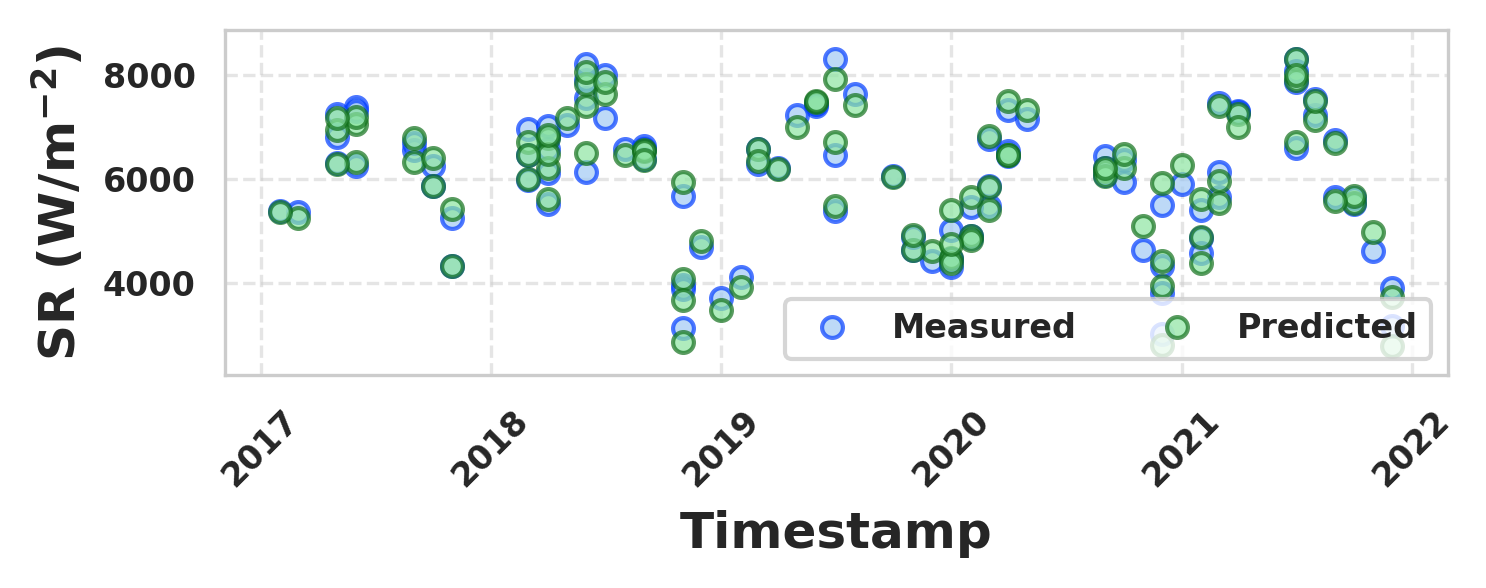

Using 100 samples
Timestamps from 2018-04-01 00:00:00 to 2017-05-01 00:00:00


In [95]:
# Convert predictions to Series
svr_predictions = pd.Series(svr_predictions, index=y_test.index)

# Define range within test set
start_idx = 0
end_idx = min(100, len(y_test))  # safer index

# Extract slices
y_true_slice = y_test.iloc[start_idx:end_idx]
y_pred_slice = svr_predictions.iloc[start_idx:end_idx]

# Use original indices to fetch timestamps from full data
original_indices = y_true_slice.index
timestamps_test = pd.to_datetime(dict(
    year=data.loc[original_indices, 'Year'].values,
    month=data.loc[original_indices, 'Month'].values,
    day=data.loc[original_indices, 'Day'].values,
    hour=data.loc[original_indices, 'Hour'].values
))

# Confirm alignment
assert len(timestamps_test) == len(y_true_slice) == len(y_pred_slice)

# Plotting
plt.figure(figsize=(5, 2), dpi=300)

y_min = min(y_true_slice.min(), y_pred_slice.min())
y_max = max(y_true_slice.max(), y_pred_slice.min())
y_buffer = (y_max - y_min) * 0.1

plt.plot(timestamps_test, y_true_slice, linewidth=0, marker='o', markersize=5,
         markerfacecolor=sns.color_palette("pastel")[0], markeredgecolor=sns.color_palette("bright")[0],
         alpha=0.7, label='Measured')

plt.plot(timestamps_test, y_pred_slice, linewidth=0, marker='o', markersize=5,
         markerfacecolor=sns.color_palette("pastel")[2], markeredgecolor=sns.color_palette("dark")[2],
         alpha=0.7, label='Predicted')

plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel('Timestamp', fontsize=12, fontfamily='sans-serif', weight='bold')
plt.ylabel('SR (W/m$^{-2}$)', fontsize=12, fontfamily='sans-serif', weight='bold')
plt.legend(loc='lower right', ncol=2, fontsize=8, framealpha=0.8)
plt.ylim(y_min - y_buffer, y_max + y_buffer)
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot
plt.savefig('SVR_Testing_Time_Timestamp.png', bbox_inches='tight', dpi=300, format='png')
plt.show()

# Diagnostics
print(f"Using {len(y_true_slice)} samples")
print(f"Timestamps from {timestamps_test.iloc[0]} to {timestamps_test.iloc[-1]}")

In [103]:
# Cross-Validation
svr_cv_model = SVR(kernel='rbf', C=100.0, epsilon=0.1)
scoring_metrics = {
    'mae': 'neg_mean_absolute_error',
    'mse': 'neg_mean_squared_error',
    'r2': 'r2'
}
svr_scores = cross_validate(svr_cv_model, X_train_scaled, y_train,
                            cv=10, scoring=scoring_metrics, return_train_score=True)
svr_rmse_scores = np.sqrt(-svr_scores['test_mse'])

# Print CV results with rounded values
print("\n=== SVR 10-Fold CV Results ===")
print(f"MAE:  {round(-svr_scores['test_mae'].mean(), 2)} ± {round(svr_scores['test_mae'].std(), 2)}")
print(f"MSE:  {round(-svr_scores['test_mse'].mean(), 2)} ± {round(svr_scores['test_mse'].std(), 2)}")
print(f"RMSE: {round(svr_rmse_scores.mean(), 2)} ± {round(svr_rmse_scores.std(), 2)}")
print(f"R²:   {round(svr_scores['test_r2'].mean(), 2)} ± {round(svr_scores['test_r2'].std(), 2)}")


=== SVR 10-Fold CV Results ===
MAE:  261.08 ± 29.11
MSE:  136016.45 ± 30990.75
RMSE: 366.19 ± 43.8
R²:   0.91 ± 0.02


In [104]:
# Save the trained model and scaler
joblib.dump(svr_model, 'svr_model_normalised.pkl')
joblib.dump(scaler, 'standard_scaler_svr_normalised.pkl')

['standard_scaler_svr_normalised.pkl']

In [105]:
# New input data from the user
user_input = {
    "Air Temperature (C°)": 200.0,
    "Air Temperature Uncertainty (C°)": 0.5,
    "Wind Direction at 3m (°N)": 180.0,
    "Wind Direction at 3m Uncertainty (°N)": 5.0,
    "Wind Speed at 3m (m/s)": 3.59,
    "Wind Speed at 3m Uncertainty (m/s)": 0.1,
    "Wind Speed at 3m (std dev) (m/s)": 0.2,
    "DHI (Wh/m2)": 2344.29,
    "DHI Uncertainty (Wh/m2)": 10.0,
    "Standard Deviation DHI (Wh/m2)": 1.0,
    "DNI (Wh/m2)": 7223.12,
    "DNI Uncertainty (Wh/m2)": 12.0,
    "Standard Deviation DNI (Wh/m2)": 1.5,
    "GHI Uncertainty (Wh/m2)": 20.0,
    "Standard Deviation GHI (Wh/m2)": 2.0,
    "Peak Wind Speed at 3m (m/s)": 4.2,
    "Peak Wind Speed at 3m Uncertainty (m/s)": 0.2,
    "Relative Humidity (%)": 21.77,
    "Relative Humidity Uncertainty (%)": 2.5,
    "Barometric Pressure (mB (hPa equiv))": 927.85,
    "Barometric Pressure Uncertainty (mB (hPa equiv))": 0.3
}

# Convert the user input to DataFrame
user_input_df = pd.DataFrame([user_input])

# Ensure the columns are in the same order as the training data
user_input_df = user_input_df[
    [
        "Air Temperature (C°)", "Air Temperature Uncertainty (C°)",
        "Wind Direction at 3m (°N)", "Wind Direction at 3m Uncertainty (°N)",
        "Wind Speed at 3m (m/s)", "Wind Speed at 3m Uncertainty (m/s)",
        "Wind Speed at 3m (std dev) (m/s)", "DHI (Wh/m2)",
        "DHI Uncertainty (Wh/m2)", "Standard Deviation DHI (Wh/m2)",
        "DNI (Wh/m2)", "DNI Uncertainty (Wh/m2)", "Standard Deviation DNI (Wh/m2)",
        "GHI Uncertainty (Wh/m2)", "Standard Deviation GHI (Wh/m2)",
        "Peak Wind Speed at 3m (m/s)", "Peak Wind Speed at 3m Uncertainty (m/s)",
        "Relative Humidity (%)", "Relative Humidity Uncertainty (%)",
        "Barometric Pressure (mB (hPa equiv))", "Barometric Pressure Uncertainty (mB (hPa equiv))"
    ]
]

# Scale the user input data
user_input_scaled = scaler.transform(user_input_df)
user_input_scaled_df = pd.DataFrame(user_input_scaled, columns=user_input_df.columns)

# Predict GHI using the trained SVR model
predicted_ghi = svr_model.predict(user_input_scaled_df)

# Display the predicted GHI with rounded value
print(f"Predicted GHI: {round(predicted_ghi[0], 2)} Wh/m²")

Predicted GHI: 6080.94 Wh/m²


XGBoost


Initialization and Model Training

Training time: 2.73 seconds


<ipython-input-8-95a1f5c463d0>:10: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_test = y_test.ravel()


<Figure size 590.551x590.551 with 0 Axes>

MAE: 47.066803723523975
MSE: 3832.061053862777
RMSE: 61.90364330039692
R^2: 0.9975783922327356
Pearson correlation: 0.998795623125865


<ipython-input-8-95a1f5c463d0>:10: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_test = y_test.ravel()


<Figure size 590.551x590.551 with 0 Axes>

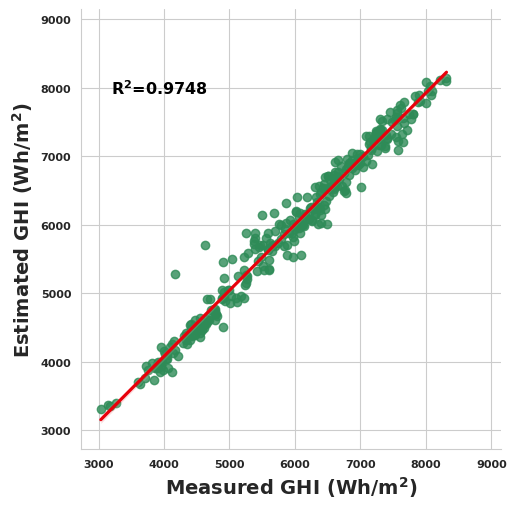

MAE: 138.75169211647727
MSE: 38443.76371792169
RMSE: 196.07081301897458
R^2: 0.9748329223932517
Pearson correlation: 0.9874654596063621


In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time
import joblib

# Define the target variable
y = data['GHI (Wh/m2)']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure column names are strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

# Convert scaled data back to DataFrame to preserve column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# Initialize XGBoost Regressor
xgb_model = XGBRegressor(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    objective='reg:squarederror',
    random_state=42,
    verbosity=0
)

# Measure training time
start_time = time.time()
xgb_model.fit(X_train_scaled, y_train)
train_time = round(time.time() - start_time, 2)
print(f"Training time: {train_time} seconds")

# Predictions
train_predictions = xgb_model.predict(X_train_scaled)
test_predictions = xgb_model.predict(X_test_scaled)

# Evaluate
evaluate(y_train, train_predictions, 'Training_data', 'XGB', loc=(1.3, 1.09, 33))
evaluate(y_test, test_predictions, 'Testing_data', 'XGB', loc=(1.3, 1.09, 33))

plt.show()

In [107]:
# Testing time
t1 = time.time()
xgb_predictions = xgb_model.predict(X_test_scaled)
test_time = round(time.time() - t1, 2)
print(f'Testing time: {test_time} sec')

# Evaluation Metrics with rounded values
print("MAE:", round(mean_absolute_error(y_test, xgb_predictions), 2))
print("MSE:", round(mean_squared_error(y_test, xgb_predictions), 2))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, xgb_predictions)), 2))
print("R² Score:", round(r2_score(y_test, xgb_predictions), 2))

Testing time: 0.01 sec
MAE: 138.75
MSE: 38443.76
RMSE: 196.07
R² Score: 0.97


Measured vs Predicted — Scatter Plot

In [108]:
plt.figure(figsize=(12, 4), dpi=100)

plt.plot(timestamps[:400], y.values[:400], 'o', c='blue', alpha=0.6, markersize=6, label='Measured')
plt.plot(timestamps[:400], xgb_model.predict(scaler.fit_transform(X)[:400]), 'o', c='red', alpha=0.6, markersize=6, label='Predicted')

plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Timestamp', fontsize=12)
plt.ylabel('Value (W/m²)', fontsize=12)
plt.title('Measured vs Predicted Values Over Time', fontsize=14, pad=15)
plt.xticks(rotation=45)
plt.legend(fontsize=10, loc='best')
plt.tight_layout()

plt.savefig('XGB_measured_vs_predicted.png', dpi=300, bbox_inches='tight')

plt.show()


In [109]:
# Convert predictions to Series
xgb_predictions = pd.Series(xgb_predictions, index=y_test.index)

# Define range within test set
start_idx = 0
end_idx = min(100, len(y_test))  # safer index

# Extract slices
y_true_slice = y_test.iloc[start_idx:end_idx]
y_pred_slice = xgb_predictions.iloc[start_idx:end_idx]

# Use original indices to fetch timestamps from full data
original_indices = y_true_slice.index
timestamps_test = pd.to_datetime(dict(
    year=data.loc[original_indices, 'Year'].values,
    month=data.loc[original_indices, 'Month'].values,
    day=data.loc[original_indices, 'Day'].values,
    hour=data.loc[original_indices, 'Hour'].values
))

# Confirm alignment
assert len(timestamps_test) == len(y_true_slice) == len(y_pred_slice)

# Plotting
plt.figure(figsize=(5, 2), dpi=300)

y_min = min(y_true_slice.min(), y_pred_slice.min())
y_max = max(y_true_slice.max(), y_pred_slice.min())
y_buffer = (y_max - y_min) * 0.1

plt.plot(timestamps_test, y_true_slice, linewidth=0, marker='o', markersize=5,
         markerfacecolor=sns.color_palette("pastel")[0], markeredgecolor=sns.color_palette("bright")[0],
         alpha=0.7, label='Measured')

plt.plot(timestamps_test, y_pred_slice, linewidth=0, marker='o', markersize=5,
         markerfacecolor=sns.color_palette("pastel")[2], markeredgecolor=sns.color_palette("dark")[2],
         alpha=0.7, label='Predicted')

plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel('Timestamp', fontsize=12, fontfamily='sans-serif', weight='bold')
plt.ylabel('SR (W/m$^{-2}$)', fontsize=12, fontfamily='sans-serif', weight='bold')
plt.legend(loc='lower right', ncol=2, fontsize=8, framealpha=0.8)
plt.ylim(y_min - y_buffer, y_max + y_buffer)
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot
plt.savefig('XGB_Testing_Time_Timestamp.png', bbox_inches='tight', dpi=300, format='png')
plt.show()

# Diagnostics
print(f"Using {len(y_true_slice)} samples")
print(f"Timestamps from {timestamps_test.iloc[0]} to {timestamps_test.iloc[-1]}")

Using 100 samples
Timestamps from 2018-04-01 00:00:00 to 2017-05-01 00:00:00


In [110]:
# Cross-Validation
xgb_cv_model = XGBRegressor(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    objective='reg:squarederror',
    random_state=42,
    verbosity=0
)
scoring_metrics = {
    'mae': 'neg_mean_absolute_error',
    'mse': 'neg_mean_squared_error',
    'r2': 'r2'
}
xgb_scores = cross_validate(xgb_cv_model, X_train_scaled, y_train,
                            cv=10, scoring=scoring_metrics, return_train_score=True)
xgb_rmse_scores = np.sqrt(-xgb_scores['test_mse'])

# Print CV results with rounded values
print("\n=== XGBoost 10-Fold CV Results ===")
print(f"MAE:  {round(-xgb_scores['test_mae'].mean(), 2)} ± {round(xgb_scores['test_mae'].std(), 2)}")
print(f"MSE:  {round(-xgb_scores['test_mse'].mean(), 2)} ± {round(xgb_scores['test_mse'].std(), 2)}")
print(f"RMSE: {round(xgb_rmse_scores.mean(), 2)} ± {round(xgb_rmse_scores.std(), 2)}")
print(f"R²:   {round(xgb_scores['test_r2'].mean(), 2)} ± {round(xgb_scores['test_r2'].std(), 2)}")


=== XGBoost 10-Fold CV Results ===
MAE:  148.37 ± 15.82
MSE:  39799.31 ± 10099.3
RMSE: 198.05 ± 23.95
R²:   0.97 ± 0.01


In [111]:
# Save the trained model and scaler
joblib.dump(xgb_model, 'XG_Boost_model_normalised.pkl')
joblib.dump(scaler, 'standard_scaler_xgb_normalised.pkl')


['standard_scaler_xgb_normalised.pkl']

In [112]:
import pandas as pd
import numpy as np

# Your user input data
user_input = {
    "Air Temperature (C°)": 200.0,
    "Air Temperature Uncertainty (C°)": 0.5,
    "Wind Direction at 3m (°N)": 180.0,
    "Wind Direction at 3m Uncertainty (°N)": 5.0,
    "Wind Speed at 3m (m/s)": 3.59,
    "Wind Speed at 3m Uncertainty (m/s)": 0.1,
    "Wind Speed at 3m (std dev) (m/s)": 0.2,
    "DHI (Wh/m2)": 2344.29,
    "DHI Uncertainty (Wh/m2)": 10.0,
    "Standard Deviation DHI (Wh/m2)": 1.0,
    "DNI (Wh/m2)": 7223.12,
    "DNI Uncertainty (Wh/m2)": 12.0,
    "Standard Deviation DNI (Wh/m2)": 1.5,
    "GHI Uncertainty (Wh/m2)": 20.0,
    "Standard Deviation GHI (Wh/m2)": 2.0,
    "Peak Wind Speed at 3m (m/s)": 4.2,
    "Peak Wind Speed at 3m Uncertainty (m/s)": 0.2,
    "Relative Humidity (%)": 21.77,
    "Relative Humidity Uncertainty (%)": 2.5,
    "Barometric Pressure (mB (hPa equiv))": 927.85,
    "Barometric Pressure Uncertainty (mB (hPa equiv))": 0.3
}

# Convert to DataFrame
user_input_df = pd.DataFrame([user_input])

# Ensure correct column order
columns = [
    "Air Temperature (C°)", "Air Temperature Uncertainty (C°)",
    "Wind Direction at 3m (°N)", "Wind Direction at 3m Uncertainty (°N)",
    "Wind Speed at 3m (m/s)", "Wind Speed at 3m Uncertainty (m/s)",
    "Wind Speed at 3m (std dev) (m/s)", "DHI (Wh/m2)",
    "DHI Uncertainty (Wh/m2)", "Standard Deviation DHI (Wh/m2)",
    "DNI (Wh/m2)", "DNI Uncertainty (Wh/m2)", "Standard Deviation DNI (Wh/m2)",
    "GHI Uncertainty (Wh/m2)", "Standard Deviation GHI (Wh/m2)",
    "Peak Wind Speed at 3m (m/s)", "Peak Wind Speed at 3m Uncertainty (m/s)",
    "Relative Humidity (%)", "Relative Humidity Uncertainty (%)",
    "Barometric Pressure (mB (hPa equiv))", "Barometric Pressure Uncertainty (mB (hPa equiv))"
]
user_input_df = user_input_df[columns]

# Ensure numeric data
user_input_df = user_input_df.astype(float)

# Scale the input data (assuming scaler is already defined)
user_input_scaled = scaler.transform(user_input_df)
user_input_scaled_df = pd.DataFrame(user_input_scaled, columns=user_input_df.columns)

# Predict GHI (assuming xgb_model is already defined)
predicted_ghi = xgb_model.predict(user_input_scaled_df)

# Display the predicted GHI with 2 decimal places
print(f"Predicted GHI: {predicted_ghi[0]:.2f} Wh/m²")

Predicted GHI: 7421.70 Wh/m²


ANN

Initialization and Model Training


Training time: 10.6 seconds


<ipython-input-8-95a1f5c463d0>:10: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_test = y_test.ravel()


<Figure size 590.551x590.551 with 0 Axes>

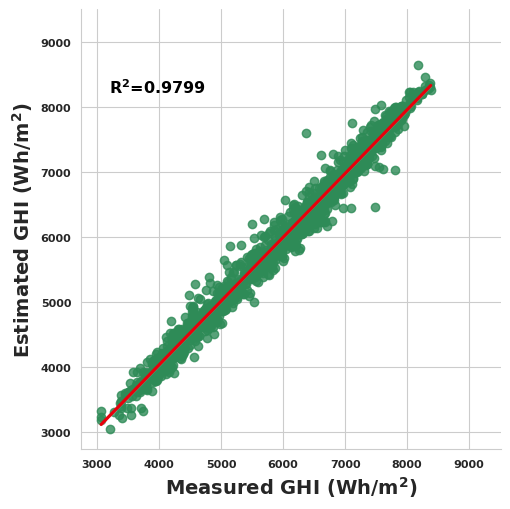

MAE: 132.5489700303501
MSE: 31813.607520942725
RMSE: 178.36369451472663
R^2: 0.9798959155413876
Pearson correlation: 0.9899000382013463


<ipython-input-8-95a1f5c463d0>:10: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_test = y_test.ravel()


<Figure size 590.551x590.551 with 0 Axes>

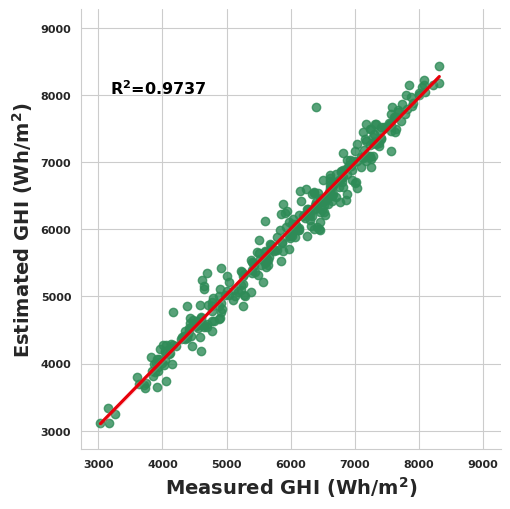

MAE: 142.87792670867748
MSE: 40224.625894431876
RMSE: 200.5607785546114
R^2: 0.9736670870985596
Pearson correlation: 0.9867711460807504


In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time
import joblib

# Define the target variable
y = data['GHI (Wh/m2)']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure column names are strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

# Convert scaled data back to DataFrame to preserve column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# Initialize MLPRegressor model
ann_model = MLPRegressor(
    hidden_layer_sizes=(16, 8),
    activation='relu',
    solver='adam',
    max_iter=1000,
    batch_size=32,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.2,
    alpha=1.0,
    verbose=False
)

# Measure training time
start_time = time.time()
ann_model.fit(X_train_scaled, y_train)
train_time = round(time.time() - start_time, 2)
print(f"Training time: {train_time} seconds")

# Predictions
train_predictions = ann_model.predict(X_train_scaled)
test_predictions = ann_model.predict(X_test_scaled)

# Evaluate
evaluate(y_train, train_predictions, 'Training_data', 'ANN', loc=(1.3, 1.09, 33))
evaluate(y_test, test_predictions, 'Testing_data', 'ANN', loc=(1.3, 1.09, 33))

plt.show()

Testing Time

In [115]:
# Testing time
t1 = time.time()
ann_predictions = ann_model.predict(X_test_scaled)
test_time = round(time.time() - t1, 2)
print(f'Testing time: {test_time} sec')

# Evaluation Metrics with rounded values
print("MAE:", round(mean_absolute_error(y_test, ann_predictions), 2))
print("MSE:", round(mean_squared_error(y_test, ann_predictions), 2))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, ann_predictions)), 2))
print("R² Score:", round(r2_score(y_test, ann_predictions), 2))

Testing time: 0.01 sec
MAE: 142.88
MSE: 40224.63
RMSE: 200.56
R² Score: 0.97


Scatter Plot: Measured vs Predicted

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


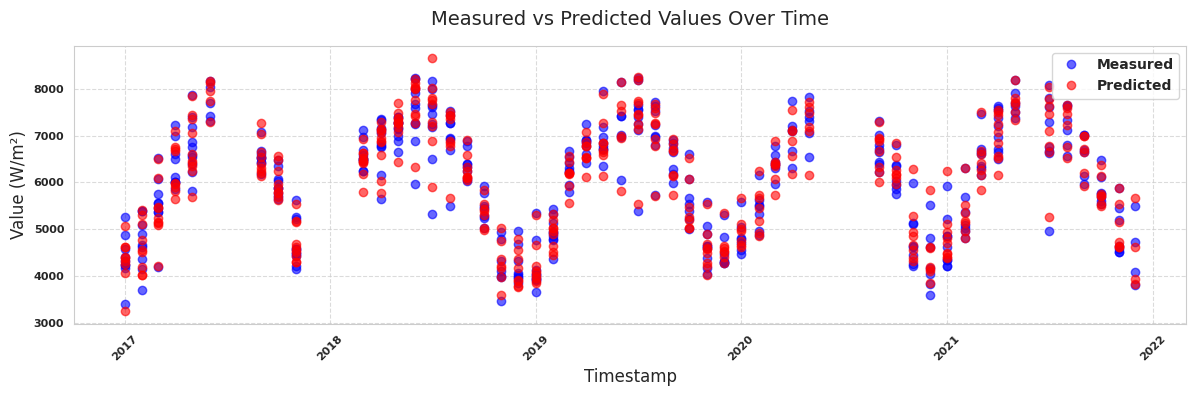

In [116]:
plt.figure(figsize=(12, 4), dpi=100)

plt.plot(timestamps[:400], y.values[:400], 'o', c='blue', alpha=0.6, markersize=6, label='Measured')
plt.plot(timestamps[:400], ann_model.predict(scaler.fit_transform(X)[:400]), 'o', c='red', alpha=0.6, markersize=6, label='Predicted')

plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Timestamp', fontsize=12)
plt.ylabel('Value (W/m²)', fontsize=12)
plt.title('Measured vs Predicted Values Over Time', fontsize=14, pad=15)
plt.xticks(rotation=45)
plt.legend(fontsize=10, loc='best')
plt.tight_layout()

plt.savefig('ANN_measured_vs_predicted.png', dpi=300, bbox_inches='tight')

plt.show()


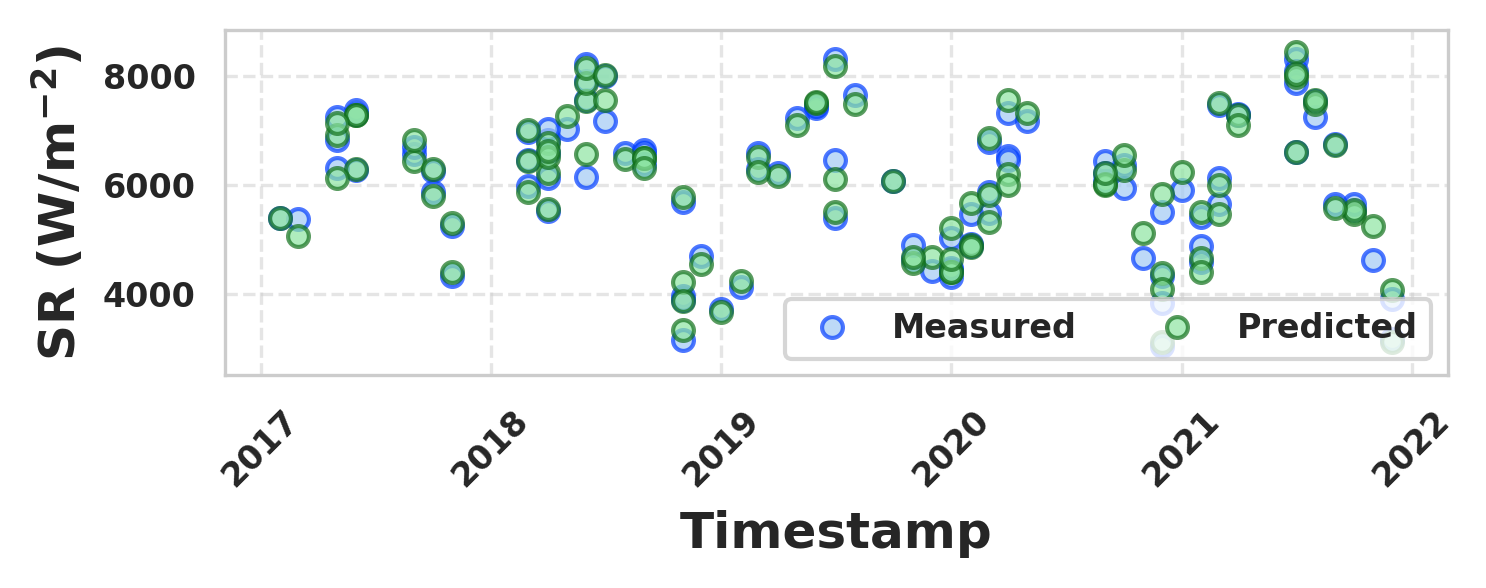

Using 100 samples
Timestamps from 2018-04-01 00:00:00 to 2017-05-01 00:00:00


In [117]:
# Convert predictions to Series
ann_predictions = pd.Series(ann_predictions, index=y_test.index)

# Define range within test set
start_idx = 0
end_idx = min(100, len(y_test))  # safer index

# Extract slices
y_true_slice = y_test.iloc[start_idx:end_idx]
y_pred_slice = ann_predictions.iloc[start_idx:end_idx]

# Use original indices to fetch timestamps from full data
original_indices = y_true_slice.index
timestamps_test = pd.to_datetime(dict(
    year=data.loc[original_indices, 'Year'].values,
    month=data.loc[original_indices, 'Month'].values,
    day=data.loc[original_indices, 'Day'].values,
    hour=data.loc[original_indices, 'Hour'].values
))

# Confirm alignment
assert len(timestamps_test) == len(y_true_slice) == len(y_pred_slice)

# Plotting
plt.figure(figsize=(5, 2), dpi=300)

y_min = min(y_true_slice.min(), y_pred_slice.min())
y_max = max(y_true_slice.max(), y_pred_slice.min())
y_buffer = (y_max - y_min) * 0.1

plt.plot(timestamps_test, y_true_slice, linewidth=0, marker='o', markersize=5,
         markerfacecolor=sns.color_palette("pastel")[0], markeredgecolor=sns.color_palette("bright")[0],
         alpha=0.7, label='Measured')

plt.plot(timestamps_test, y_pred_slice, linewidth=0, marker='o', markersize=5,
         markerfacecolor=sns.color_palette("pastel")[2], markeredgecolor=sns.color_palette("dark")[2],
         alpha=0.7, label='Predicted')

plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel('Timestamp', fontsize=12, fontfamily='sans-serif', weight='bold')
plt.ylabel('SR (W/m$^{-2}$)', fontsize=12, fontfamily='sans-serif', weight='bold')
plt.legend(loc='lower right', ncol=2, fontsize=8, framealpha=0.8)
plt.ylim(y_min - y_buffer, y_max + y_buffer)
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot
plt.savefig('ANN_Testing_Time_Timestamp.png', bbox_inches='tight', dpi=300, format='png')
plt.show()

# Diagnostics
print(f"Using {len(y_true_slice)} samples")
print(f"Timestamps from {timestamps_test.iloc[0]} to {timestamps_test.iloc[-1]}")

 Cross Validation

In [118]:
# Cross-Validation
ann_cv_model = MLPRegressor(
    hidden_layer_sizes=(16, 8),
    activation='relu',
    solver='adam',
    max_iter=1000,
    batch_size=32,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.2,
    alpha=1.0,
    verbose=False
)
scoring_metrics = {
    'mae': 'neg_mean_absolute_error',
    'mse': 'neg_mean_squared_error',
    'r2': 'r2'
}
ann_scores = cross_validate(ann_cv_model, X_train_scaled, y_train,
                            cv=10, scoring=scoring_metrics, return_train_score=True)
ann_rmse_scores = np.sqrt(-ann_scores['test_mse'])

# Print CV results with rounded values
print("\n=== ANN 10-Fold CV Results ===")
print(f"MAE:  {round(-ann_scores['test_mae'].mean(), 2)} ± {round(ann_scores['test_mae'].std(), 2)}")
print(f"MSE:  {round(-ann_scores['test_mse'].mean(), 2)} ± {round(ann_scores['test_mse'].std(), 2)}")
print(f"RMSE: {round(ann_rmse_scores.mean(), 2)} ± {round(ann_rmse_scores.std(), 2)}")
print(f"R²:   {round(ann_scores['test_r2'].mean(), 2)} ± {round(ann_scores['test_r2'].std(), 2)}")


=== ANN 10-Fold CV Results ===
MAE:  154.4 ± 15.51
MSE:  61990.12 ± 36218.44
RMSE: 241.22 ± 61.66
R²:   0.96 ± 0.03


In [119]:
# Save the trained model and scaler
joblib.dump(ann_model, 'ANN_model_scikit.pkl')
joblib.dump(scaler, 'standard_scaler_ann_scikit.pkl')

['standard_scaler_ann_scikit.pkl']

In [120]:

# New input data from the user
user_input = {
    "Air Temperature (C°)": 200.0,
    "Air Temperature Uncertainty (C°)": 0.5,
    "Wind Direction at 3m (°N)": 180.0,
    "Wind Direction at 3m Uncertainty (°N)": 5.0,
    "Wind Speed at 3m (m/s)": 3.59,
    "Wind Speed at 3m Uncertainty (m/s)": 0.1,
    "Wind Speed at 3m (std dev) (m/s)": 0.2,
    "DHI (Wh/m2)": 2344.29,
    "DHI Uncertainty (Wh/m2)": 10.0,
    "Standard Deviation DHI (Wh/m2)": 1.0,
    "DNI (Wh/m2)": 7223.12,
    "DNI Uncertainty (Wh/m2)": 12.0,
    "Standard Deviation DNI (Wh/m2)": 1.5,
    "GHI Uncertainty (Wh/m2)": 20.0,
    "Standard Deviation GHI (Wh/m2)": 2.0,
    "Peak Wind Speed at 3m (m/s)": 4.2,
    "Peak Wind Speed at 3m Uncertainty (m/s)": 0.2,
    "Relative Humidity (%)": 21.77,
    "Relative Humidity Uncertainty (%)": 2.5,
    "Barometric Pressure (mB (hPa equiv))": 927.85,
    "Barometric Pressure Uncertainty (mB (hPa equiv))": 0.3
}

# Convert the user input to DataFrame
user_input_df = pd.DataFrame([user_input])

# Ensure the columns are in the same order as the training data
user_input_df = user_input_df[
    [
        "Air Temperature (C°)", "Air Temperature Uncertainty (C°)",
        "Wind Direction at 3m (°N)", "Wind Direction at 3m Uncertainty (°N)",
        "Wind Speed at 3m (m/s)", "Wind Speed at 3m Uncertainty (m/s)",
        "Wind Speed at 3m (std dev) (m/s)", "DHI (Wh/m2)",
        "DHI Uncertainty (Wh/m2)", "Standard Deviation DHI (Wh/m2)",
        "DNI (Wh/m2)", "DNI Uncertainty (Wh/m2)", "Standard Deviation DNI (Wh/m2)",
        "GHI Uncertainty (Wh/m2)", "Standard Deviation GHI (Wh/m2)",
        "Peak Wind Speed at 3m (m/s)", "Peak Wind Speed at 3m Uncertainty (m/s)",
        "Relative Humidity (%)", "Relative Humidity Uncertainty (%)",
        "Barometric Pressure (mB (hPa equiv))", "Barometric Pressure Uncertainty (mB (hPa equiv))"
    ]
]

# Scale the user input data
user_input_scaled = scaler.transform(user_input_df)
user_input_scaled_df = pd.DataFrame(user_input_scaled, columns=user_input_df.columns)

# Predict GHI using the trained ANN model
predicted_ghi = ann_model.predict(user_input_scaled_df)

# Display the predicted GHI with rounded value
print(f"Predicted GHI: {round(predicted_ghi[0], 2)} Wh/m²")

Predicted GHI: 22799.8 Wh/m²


### HIST GRADIENT BOOSTING

Initialization and Model Training

Training time: 0.83 seconds


<ipython-input-8-95a1f5c463d0>:10: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_test = y_test.ravel()


<Figure size 590.551x590.551 with 0 Axes>

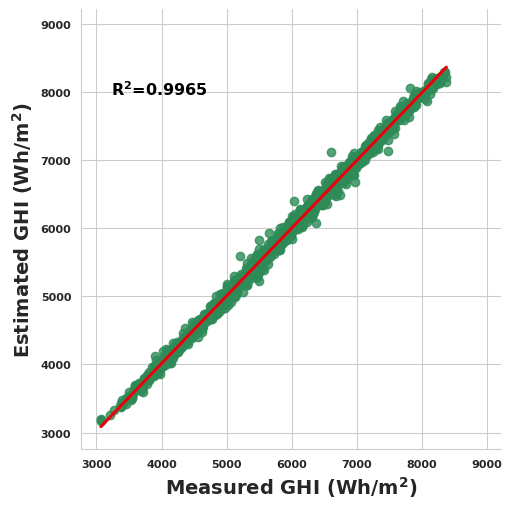

MAE: 55.32497624868557
MSE: 5555.610260907145
RMSE: 74.53596622374425
R^2: 0.9964892237439315
Pearson correlation: 0.9982481770427032


<ipython-input-8-95a1f5c463d0>:10: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_test = y_test.ravel()


<Figure size 590.551x590.551 with 0 Axes>

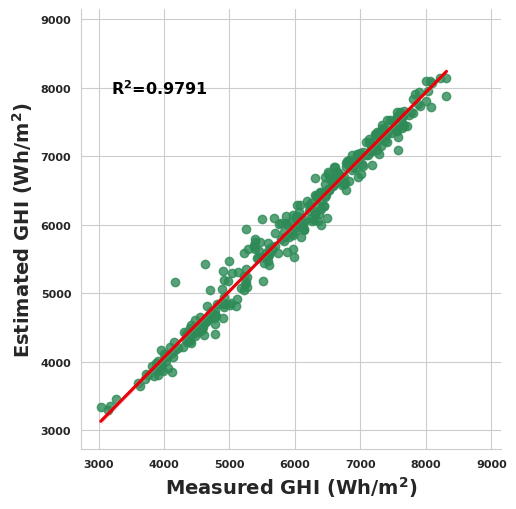

MAE: 128.20113488504145
MSE: 31873.97583611146
RMSE: 178.53284245793952
R^2: 0.9791338114189616
Pearson correlation: 0.9895987613908669


In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time
import joblib

# Define the target variable
y = data['GHI (Wh/m2)']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure column names are strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

# Convert scaled data back to DataFrame to preserve column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# Initialize HistGradientBoostingRegressor
hgb_model = HistGradientBoostingRegressor(
    max_iter=100,
    learning_rate=0.1,
    max_depth=6,
    min_samples_leaf=20,
    random_state=42
)

# Measure training time
start_time = time.time()
hgb_model.fit(X_train_scaled, y_train)
train_time = round(time.time() - start_time, 2)
print(f"Training time: {train_time} seconds")

# Predictions
train_predictions = hgb_model.predict(X_train_scaled)
test_predictions = hgb_model.predict(X_test_scaled)

# Evaluate (assuming evaluate function is defined)
evaluate(y_train, train_predictions, 'Training_data', 'HGB', loc=(1.3, 1.09, 33))
evaluate(y_test, test_predictions, 'Testing_data', 'HGB', loc=(1.3, 1.09, 33))

plt.show()

In [123]:
# Testing time
t1 = time.time()
hgb_predictions = hgb_model.predict(X_test_scaled)
test_time = round(time.time() - t1, 2)
print(f'Testing time: {test_time} sec')

# Evaluation Metrics with rounded values
print("MAE:", round(mean_absolute_error(y_test, hgb_predictions), 2))
print("MSE:", round(mean_squared_error(y_test, hgb_predictions), 2))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, hgb_predictions)), 2))
print("R² Score:", round(r2_score(y_test, hgb_predictions), 2))


Testing time: 0.02 sec
MAE: 128.2
MSE: 31873.98
RMSE: 178.53
R² Score: 0.98


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  warnings.warn(


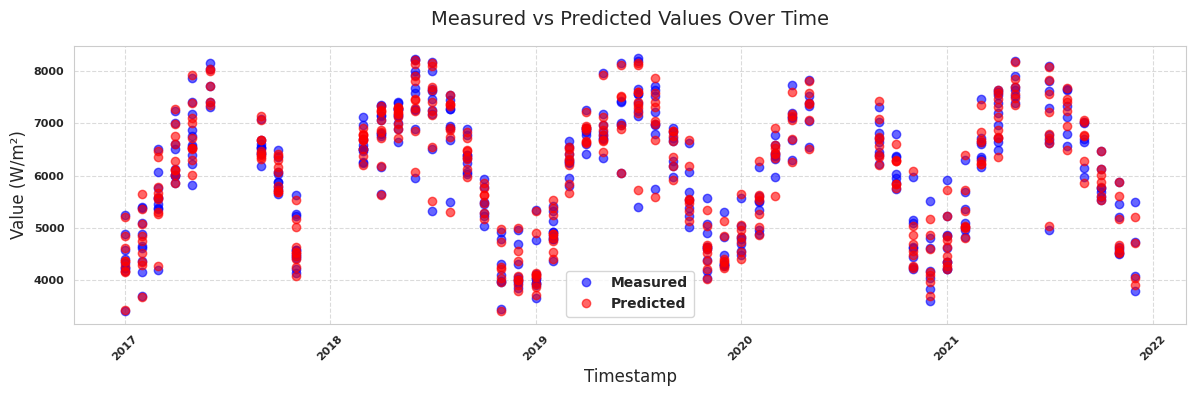

In [124]:
plt.figure(figsize=(12, 4), dpi=100)

plt.plot(timestamps[:400], y.values[:400], 'o', c='blue', alpha=0.6, markersize=6, label='Measured')
plt.plot(timestamps[:400], hgb_model.predict(scaler.fit_transform(X)[:400]), 'o', c='red', alpha=0.6, markersize=6, label='Predicted')

plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Timestamp', fontsize=12)
plt.ylabel('Value (W/m²)', fontsize=12)
plt.title('Measured vs Predicted Values Over Time', fontsize=14, pad=15)
plt.xticks(rotation=45)
plt.legend(fontsize=10, loc='best')
plt.tight_layout()

plt.savefig('HGB_measured_vs_predicted.png', dpi=300, bbox_inches='tight')

plt.show()


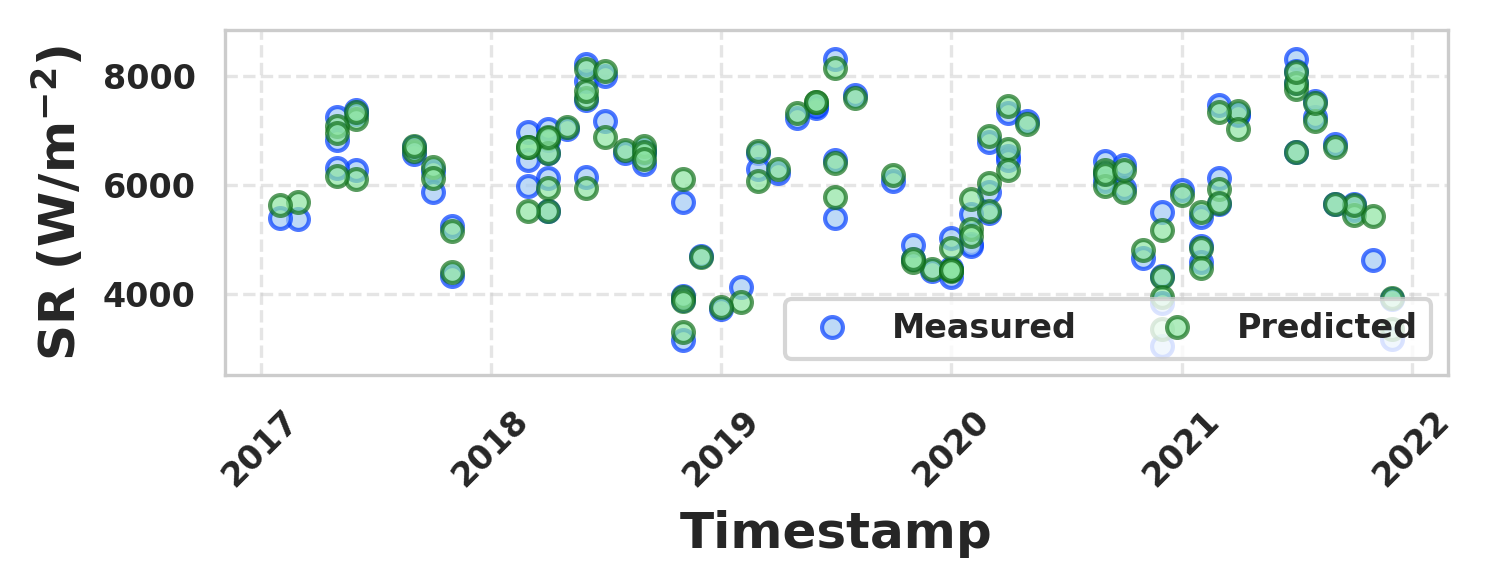

Using 100 samples
Timestamps from 2018-04-01 00:00:00 to 2017-05-01 00:00:00


In [125]:
# Convert predictions to Series
hgb_predictions = pd.Series(hgb_predictions, index=y_test.index)

# Define range within test set
start_idx = 0
end_idx = min(100, len(y_test))  # safer index

# Extract slices
y_true_slice = y_test.iloc[start_idx:end_idx]
y_pred_slice = hgb_predictions.iloc[start_idx:end_idx]

# Use original indices to fetch timestamps from full data
original_indices = y_true_slice.index
timestamps_test = pd.to_datetime(dict(
    year=data.loc[original_indices, 'Year'].values,
    month=data.loc[original_indices, 'Month'].values,
    day=data.loc[original_indices, 'Day'].values,
    hour=data.loc[original_indices, 'Hour'].values
))

# Confirm alignment
assert len(timestamps_test) == len(y_true_slice) == len(y_pred_slice)

# Plotting
plt.figure(figsize=(5, 2), dpi=300)

y_min = min(y_true_slice.min(), y_pred_slice.min())
y_max = max(y_true_slice.max(), y_pred_slice.min())
y_buffer = (y_max - y_min) * 0.1

plt.plot(timestamps_test, y_true_slice, linewidth=0, marker='o', markersize=5,
         markerfacecolor=sns.color_palette("pastel")[0], markeredgecolor=sns.color_palette("bright")[0],
         alpha=0.7, label='Measured')

plt.plot(timestamps_test, y_pred_slice, linewidth=0, marker='o', markersize=5,
         markerfacecolor=sns.color_palette("pastel")[2], markeredgecolor=sns.color_palette("dark")[2],
         alpha=0.7, label='Predicted')

plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel('Timestamp', fontsize=12, fontfamily='sans-serif', weight='bold')
plt.ylabel('SR (W/m$^{-2}$)', fontsize=12, fontfamily='sans-serif', weight='bold')
plt.legend(loc='lower right', ncol=2, fontsize=8, framealpha=0.8)
plt.ylim(y_min - y_buffer, y_max + y_buffer)
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot
plt.savefig('HGB_Testing_Time_Timestamp.png', bbox_inches='tight', dpi=300, format='png')
plt.show()

# Diagnostics
print(f"Using {len(y_true_slice)} samples")
print(f"Timestamps from {timestamps_test.iloc[0]} to {timestamps_test.iloc[-1]}")

In [126]:
# Cross-Validation
hgb_cv_model = HistGradientBoostingRegressor(
    max_iter=100,
    learning_rate=0.1,
    max_depth=6,
    min_samples_leaf=20,
    random_state=42
)
scoring_metrics = {
    'mae': 'neg_mean_absolute_error',
    'mse': 'neg_mean_squared_error',
    'r2': 'r2'
}
hgb_scores = cross_validate(hgb_cv_model, X_train_scaled, y_train,
                            cv=10, scoring=scoring_metrics, return_train_score=True)
hgb_rmse_scores = np.sqrt(-hgb_scores['test_mse'])

# Print CV results with rounded values
print("\n=== HistGradientBoosting 10-Fold CV Results ===")
print(f"MAE:  {round(-hgb_scores['test_mae'].mean(), 2)} ± {round(hgb_scores['test_mae'].std(), 2)}")
print(f"MSE:  {round(-hgb_scores['test_mse'].mean(), 2)} ± {round(hgb_scores['test_mse'].std(), 2)}")
print(f"RMSE: {round(hgb_rmse_scores.mean(), 2)} ± {round(hgb_rmse_scores.std(), 2)}")
print(f"R²:   {round(hgb_scores['test_r2'].mean(), 2)} ± {round(hgb_scores['test_r2'].std(), 2)}")


=== HistGradientBoosting 10-Fold CV Results ===
MAE:  140.58 ± 19.82
MSE:  37838.14 ± 12478.65
RMSE: 192.11 ± 30.54
R²:   0.98 ± 0.01


In [127]:
# Save the trained model and scaler
joblib.dump(hgb_model, 'HGB_model_normalised.pkl')
joblib.dump(scaler, 'standard_scaler_hgb_normalised.pkl')

['standard_scaler_hgb_normalised.pkl']

In [128]:
# User Input Prediction
user_input = {
    "Air Temperature (C°)": 200.0,
    "Air Temperature Uncertainty (C°)": 0.5,
    "Wind Direction at 3m (°N)": 180.0,
    "Wind Direction at 3m Uncertainty (°N)": 5.0,
    "Wind Speed at 3m (m/s)": 3.59,
    "Wind Speed at 3m Uncertainty (m/s)": 0.1,
    "Wind Speed at 3m (std dev) (m/s)": 0.2,
    "DHI (Wh/m2)": 2344.29,
    "DHI Uncertainty (Wh/m2)": 10.0,
    "Standard Deviation DHI (Wh/m2)": 1.0,
    "DNI (Wh/m2)": 7223.12,
    "DNI Uncertainty (Wh/m2)": 12.0,
    "Standard Deviation DNI (Wh/m2)": 1.5,
    "GHI Uncertainty (Wh/m2)": 20.0,
    "Standard Deviation GHI (Wh/m2)": 2.0,
    "Peak Wind Speed at 3m (m/s)": 4.2,
    "Peak Wind Speed at 3m Uncertainty (m/s)": 0.2,
    "Relative Humidity (%)": 21.77,
    "Relative Humidity Uncertainty (%)": 2.5,
    "Barometric Pressure (mB (hPa equiv))": 927.85,
    "Barometric Pressure Uncertainty (mB (hPa equiv))": 0.3
}

# Convert to DataFrame
user_input_df = pd.DataFrame([user_input])

# Ensure correct column order
columns = [
    "Air Temperature (C°)", "Air Temperature Uncertainty (C°)",
    "Wind Direction at 3m (°N)", "Wind Direction at 3m Uncertainty (°N)",
    "Wind Speed at 3m (m/s)", "Wind Speed at 3m Uncertainty (m/s)",
    "Wind Speed at 3m (std dev) (m/s)", "DHI (Wh/m2)",
    "DHI Uncertainty (Wh/m2)", "Standard Deviation DHI (Wh/m2)",
    "DNI (Wh/m2)", "DNI Uncertainty (Wh/m2)", "Standard Deviation DNI (Wh/m2)",
    "GHI Uncertainty (Wh/m2)", "Standard Deviation GHI (Wh/m2)",
    "Peak Wind Speed at 3m (m/s)", "Peak Wind Speed at 3m Uncertainty (m/s)",
    "Relative Humidity (%)", "Relative Humidity Uncertainty (%)",
    "Barometric Pressure (mB (hPa equiv))", "Barometric Pressure Uncertainty (mB (hPa equiv))"
]
user_input_df = user_input_df[columns]

# Ensure numeric data
user_input_df = user_input_df.astype(float)

# Scale the input data
user_input_scaled = scaler.transform(user_input_df)
user_input_scaled_df = pd.DataFrame(user_input_scaled, columns=user_input_df.columns)

# Predict GHI
predicted_ghi = hgb_model.predict(user_input_scaled_df)

# Display the predicted GHI with 2 decimal places
print(f"Predicted GHI: {predicted_ghi[0]:.2f} Wh/m²")

Predicted GHI: 7635.03 Wh/m²


###MODEL COMPARISON


=== Model Performance Summary ===

               Model    MAE  MAE Std       MSE  MSE Std   RMSE  RMSE Std   R2  R2 Std  Training Time (s)
HistGradientBoosting 140.58    19.82  37838.14 12478.65 192.11     30.54 0.98    0.01               0.21
   Linear Regression 135.94    12.05  39990.28 23383.73 193.74     49.53 0.97    0.02               0.01
       Random Forest 167.80    24.33  53770.46 16650.72 229.34     34.25 0.97    0.01               1.64
             XGBoost 148.37    15.82  39799.31 10099.30 198.05     23.95 0.97    0.01               0.38
                 ANN 154.40    15.51  61990.12 36218.44 241.22     61.66 0.96    0.03               8.32
                 SVR 261.08    29.11 136016.45 30990.75 366.19     43.80 0.91    0.02               0.23
       Decision Tree 308.38    31.22 201805.76 52940.32 445.55     57.40 0.87    0.03               0.02
                 KNN 355.15    31.12 215790.97 41848.70 462.37     44.76 0.86    0.03               0.01


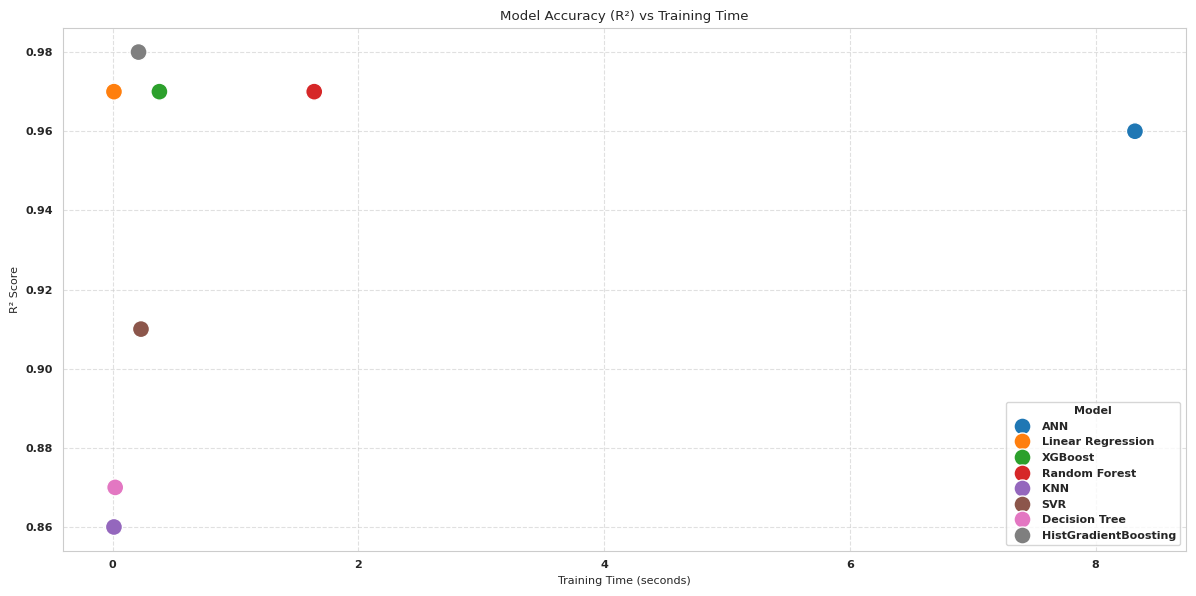

In [141]:

# Create the summary dictionary
model_summary = {
    "Model": [
        "ANN", "Linear Regression", "XGBoost", "Random Forest",
        "KNN", "SVR", "Decision Tree", "HistGradientBoosting"
    ],
    "MAE": [154.4, 135.94, 148.37, 167.8, 355.15, 261.08, 308.38, 140.58],
    "MAE Std": [15.51, 12.05, 15.82, 24.33, 31.12, 29.11, 31.22, 19.82],
    "MSE": [61990.12, 39990.28, 39799.31, 53770.46, 215790.97, 136016.45, 201805.76, 37838.14],
    "MSE Std": [36218.44, 23383.73, 10099.3, 16650.72, 41848.7, 30990.75, 52940.32, 12478.65],
    "RMSE": [241.22, 193.74, 198.05, 229.34, 462.37, 366.19, 445.55, 192.11],
    "RMSE Std": [61.66, 49.53, 23.95, 34.25, 44.76, 43.8, 57.4, 30.54],
    "R2": [0.96, 0.97, 0.97, 0.97, 0.86, 0.91, 0.87, 0.98],
    "R2 Std": [0.03, 0.02, 0.01, 0.01, 0.03, 0.02, 0.03, 0.01],
    "Training Time (s)": [8.32, 0.01, 0.38, 1.64, 0.01, 0.23, 0.02, 0.21]
}

# Create DataFrame
summary_df = pd.DataFrame(model_summary)

# Sort by R2 descending
summary_df_sorted = summary_df.sort_values(by="R2", ascending=False)

# Display table
print("\n=== Model Performance Summary ===\n")
print(summary_df_sorted.to_string(index=False))

# Plot R² vs Training Time
plt.figure(figsize=(12, 6))
sns.scatterplot(data=summary_df, x="Training Time (s)", y="R2", hue="Model", s=150)
plt.title("Model Accuracy (R²) vs Training Time")
plt.xlabel("Training Time (seconds)")
plt.ylabel("R² Score")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.savefig('model_comparison_image.png')

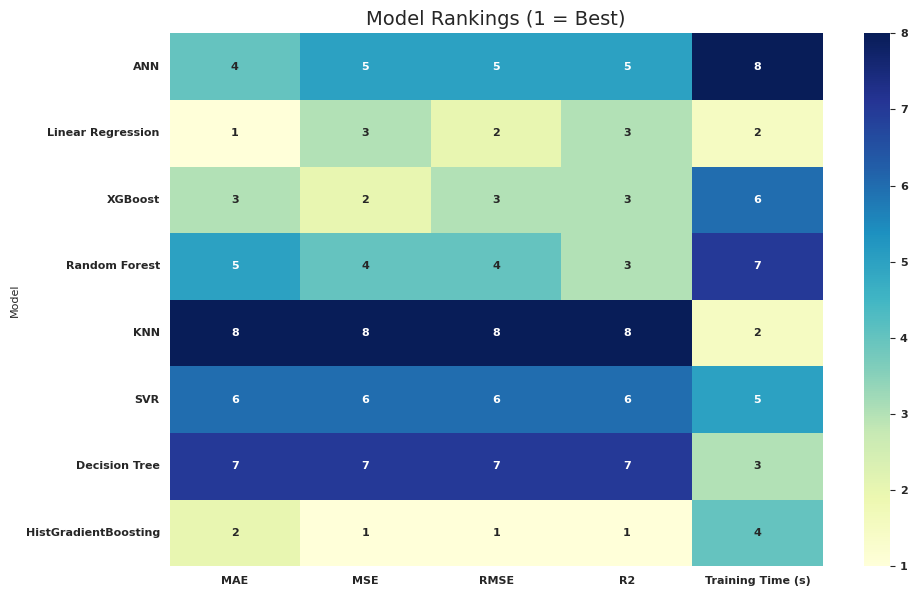

In [142]:
# Create the summary dictionary
model_summary = {
    "Model": [
        "ANN", "Linear Regression", "XGBoost", "Random Forest",
        "KNN", "SVR", "Decision Tree", "HistGradientBoosting"
    ],
    "MAE": [154.4, 135.94, 148.37, 167.8, 355.15, 261.08, 308.38, 140.58],
    "MAE Std": [15.51, 12.05, 15.82, 24.33, 31.12, 29.11, 31.22, 19.82],
    "MSE": [61990.12, 39990.28, 39799.31, 53770.46, 215790.97, 136016.45, 201805.76, 37838.14],
    "MSE Std": [36218.44, 23383.73, 10099.3, 16650.72, 41848.7, 30990.75, 52940.32, 12478.65],
    "RMSE": [241.22, 193.74, 198.05, 229.34, 462.37, 366.19, 445.55, 192.11],
    "RMSE Std": [61.66, 49.53, 23.95, 34.25, 44.76, 43.8, 57.4, 30.54],
    "R2": [0.96, 0.97, 0.97, 0.97, 0.86, 0.91, 0.87, 0.98],
    "R2 Std": [0.03, 0.02, 0.01, 0.01, 0.03, 0.02, 0.03, 0.01],
    "Training Time (s)": [8.32, 0.01, 0.38, 1.64, 0.01, 0.23, 0.02, 0.21]
}

# Create DataFrame
summary_df = pd.DataFrame(model_summary)

# Invert metrics where lower is better
ranked_df = summary_df.copy()
metrics_to_rank = ["MAE", "MSE", "RMSE", "Training Time (s)"]
for col in metrics_to_rank:
    ranked_df[col] = ranked_df[col].rank(ascending=True)

# For R², higher is better
ranked_df["R2"] = ranked_df["R2"].rank(ascending=False)

# Heatmap data
heatmap_data = ranked_df.set_index("Model")[["MAE", "MSE", "RMSE", "R2", "Training Time (s)"]]

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", cbar=True, fmt=".0f")
plt.title("Model Rankings (1 = Best)", fontsize=14)
plt.tight_layout()
plt.savefig("Model_Rankings_Heatmap_.png", dpi=300, bbox_inches="tight")

<ipython-input-143-6703a45b3201>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_df_sorted, x="Model", y="R2", palette="crest")
<ipython-input-143-6703a45b3201>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_df_sorted, x="Model", y="Training Time (s)", palette="mako")


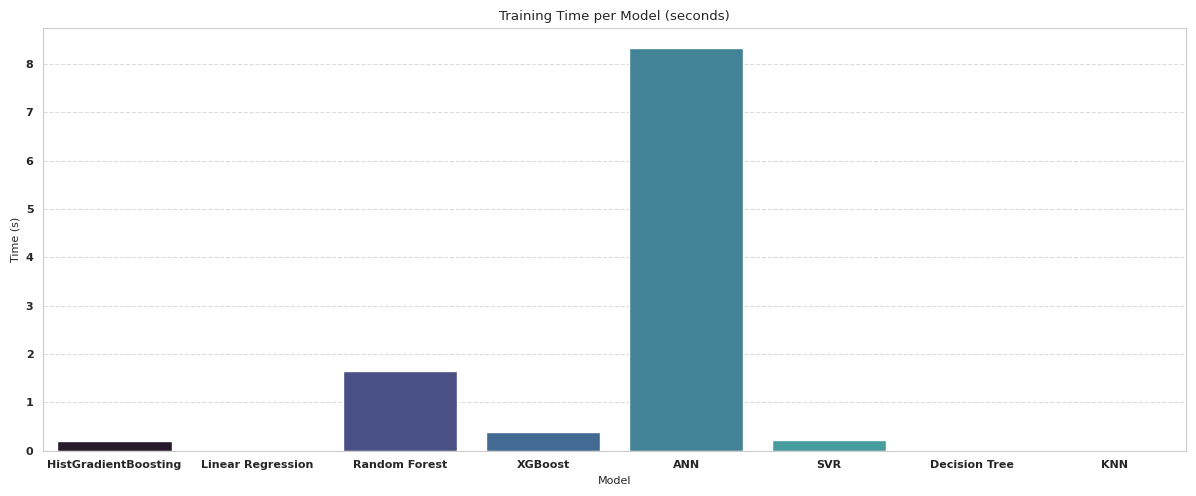

In [143]:
# Create the summary dictionary
model_summary = {
    "Model": [
        "ANN", "Linear Regression", "XGBoost", "Random Forest",
        "KNN", "SVR", "Decision Tree", "HistGradientBoosting"
    ],
    "MAE": [154.4, 135.94, 148.37, 167.8, 355.15, 261.08, 308.38, 140.58],
    "MAE Std": [15.51, 12.05, 15.82, 24.33, 31.12, 29.11, 31.22, 19.82],
    "MSE": [61990.12, 39990.28, 39799.31, 53770.46, 215790.97, 136016.45, 201805.76, 37838.14],
    "MSE Std": [36218.44, 23383.73, 10099.3, 16650.72, 41848.7, 30990.75, 52940.32, 12478.65],
    "RMSE": [241.22, 193.74, 198.05, 229.34, 462.37, 366.19, 445.55, 192.11],
    "RMSE Std": [61.66, 49.53, 23.95, 34.25, 44.76, 43.8, 57.4, 30.54],
    "R2": [0.96, 0.97, 0.97, 0.97, 0.86, 0.91, 0.87, 0.98],
    "R2 Std": [0.03, 0.02, 0.01, 0.01, 0.03, 0.02, 0.03, 0.01],
    "Training Time (s)": [8.32, 0.01, 0.38, 1.64, 0.01, 0.23, 0.02, 0.21]
}

# Create DataFrame
summary_df = pd.DataFrame(model_summary)

# Sort by R2 descending
summary_df_sorted = summary_df.sort_values(by="R2", ascending=False)

# Bar Plot for R² Score
plt.figure(figsize=(12, 5))
sns.barplot(data=summary_df_sorted, x="Model", y="R2", palette="crest")
plt.title("R² Score per Model")
plt.ylabel("R²")
plt.ylim(0.85, 1.0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig("R2_Score_Per_Model_image.png", dpi=300, bbox_inches="tight")

# Bar Plot for Training Time
plt.figure(figsize=(12, 5))
sns.barplot(data=summary_df_sorted, x="Model", y="Training Time (s)", palette="mako")
plt.title("Training Time per Model (seconds)")
plt.ylabel("Time (s)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig("Training_Time_Per_Model_image.png", dpi=300, bbox_inches="tight")